 ## Table of Contents
1. [Introduction](#introduction)
2. [Getting Started](#start) <br>
    2.1 [Importing Libraries](#library) <br>
    2.2 [Import Datasets](#data) <br>
    2.3 [Take a Peek at the Dataset](#data1)<br>
3. [Pre-data cleaning, Pre-EDA](#plot)<br>
    3.1 [Plotting Some Counts for each variable](#count) <br>
    3.2 [Compare Independent Variables with our output - Survived](#survive)<br>
    3.2.1 [Gender vs Survived](#gender) <br>
    3.2.2 [Pclass vs Survived](#pclass) <br>
    3.2.3 [Embarked vs Survived](#embarked)<br>
    3.2.4 [Age vs Survived](#age)<br>
    3.2.5 [Fare vs Survived](#fare)<br>
    3.3 [Correlation Matrix](#corr) <br>
4. [Feature Engineering](#eng) <br>
    4.1 [Imputation](#imp) <br>
    4.1.1 [Missing Fares](#fare)<br>
    4.1.2 [Missing Embarked](#emb)<br>
    4.1.3 [Missing Age](#age)<br>
    4.2 [Outliers](#out) <br>
    4.3 [Drop Features](#drop)<br>
    4.3.1 [Passenger ID](#id)<br>
    4.3.2 [Ticket](#ticket)<br>
    4.3.3 [Name](#name)<br>
    4.3.4 [Cabin](#cab)<br>
    4.4 [Binning?](#bin) <br>
    4.5 [Encoding](#enc) <br>
    4.6 [Feature Scaling](#scale) <br>
5. [Machine Learning Modelling](#model)<br>
    5.0 [Pre-Modeling Final Touch Up](#pre)<br>
    5.0.1 [Dropping Useless Features](#drop)<br>
    5.0.2 [Separating dependent and independent variables](#sep)<br>
    5.0.3 [Train Test Split VS Cross Validation](#split)<br>
    5.0.4 [Feature Scaling](#scale)<br>
    5.0.5 [Using Train Test Split for Logistic Regression](#logreg)<br>
    5.1 [Logistic Regression](#log) <br>
    5.1.1 [Choose CV method](#cv) <br>
    5.1.2 [Model Accuracy](#Accuracy)<br>
    5.1.3 [ROC and AUC](#roc)<br>
    5.1.4 [Stratified Cross Validation](#stratified)<br>
6. [Other Machine Learning Models](#classifications)<br>
    6.1 [KNN](#knn)<br>
    6.2 [Support Vector Machine](#SVM) <br>
    6.3 [Decision Tree](#dt)<br>
    6.4 [Random Forest](#rf) <br>
7. [Part 1: Intuitive explanation of Logistic Regression](#ls)
    

## 1) **Introduction** <a id="introduction"></a> <a id="Introduction"></a>

This is my first Notebook, and is of course an entry level write-up where my target audience is for anyone who has just started to venture into data science. Although I will include some very popular models, I will mainly focus on Logistic Regression. In particular, I will write an **intuitive** derivation of logistic regression and what are the necessary assumptions that one should fulfill before choosing this model. I believe that many new data analyst/scientists often fall into the traps of blindly using different models without understanding them fully. This will lead to many problems like overfitting/underfitting, which can be costly especially if your model is used to determine some real world problems. That being said, most of us here may not be mathematically mature enough to understand the proofs, that is why the next best thing that one can do is to understand the intuition behind each algorithm, and that will help you a long way. 

<br>

Also, since I did not have any programming experience, I had a difficult time picking the language up at first - and therefore annotated codes with explanation beside. I will include those annotations in my Notebook.

<br>

If you find my explanation clear and wish to see me do a similar one on some other Machine Learning algorithms like Random Forest or others, please give me an upvote or leave a comment - **that will motivate me further**. 

Also, you can clarify any questions through the comments. I will be quite active on Kaggle so I will reply almost every day. Furthermore, there are a lot of Kagglers who are extremely experienced and good with data science, please feel free to criticize and I will make the necessary amendments - this will **ensure** that the kernel is up to date and contain the most accurate materials.

<br>

Last but not least, section 7 will provide you with an intuitive logistic regression write up, a rough idea on how it works. 




13/10/2019: Update on algorithm in random forest 

20/10/2019: Improved methods on EDA with some explanation on the code. It may be useful for some who wants neater presentation.

## 2) **Getting Started** <a id="start"></a>

### 2.1) Importing Libraries <a id="library"></a>

This is our very first step, we shall import the necessary libraries that we want into python. We can add libraries along the way. Always import the basic libraries first.

In [1]:
%matplotlib inline 
import numpy as np 
import scipy as sp 
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 
#from pandas.tools.plotting import scatter_matrix
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import string
import math
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

### 2.2) Import Datasets <a id="data"></a>

Our second step is to import our datasets, in this case, we import train and test datasets. There are various ways to import your datasets into python. Here I give an overview of what train and test datasets mean.
<br>

**Training and Testing Sets**

   a) **Training data:** Training data is the information used to train an algorithm. The training data includes both input data and the corresponding expected output. We can train different machine learning algorithms on the training data, in the hopes of finding one best algorithm for a particular problem that predicts well. Bear in mind that even if our algorithm performs extremely well on the training data, it may be a result of overfitting, and may not replicate the same accuracy when the algorithm is applied to some unseen (test) data. 

   b) **Testing data:** On the other hand, includes only input data, not the corresponding expected output. The testing data is used to assess how well your algorithm was trained, and to estimate model properties.
   
<br>
     
So in our training data, we see that our second column says whether the passenger survived or not. The survived column is our output.  And in our test data, the output is not there, it is for us to TEST if our model developed based on the training set is accurate. However the preceding sentence seems to have a problem, IF, in the real world, we do not have the 'answers' for the test data, how then, would we be able to tell how well the training algorithm is performing on the test set. To resolve that issue, we usually perform train test split/cross validation method on the given training set first. See section 5.03 for more details.

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
Test = pd.read_csv("../input/titanic/test.csv")

combine = [train, Test]
combined = pd.concat(combine)

### 2.3) Peeking at Datasets <a id="data1"></a>

We view the first 5 and last 5 rows of the data frame to have an idea of how the data is presented.
We also check train.info() to see the data types, and from there we also can get a rough idea which column have missing values, as indicated by non-nulls. 

<br>

It is always a good habit to run these codes because we want to get a good idea of what data types we are dealing with. Sometimes data types may come in wrong formats which make data analysis difficult, for instance a column supposed to contain numeric data may be stored as string or a column supposed to contain categorical data stored as a string. Note since we are dealing extensively with Pandas, one can google the **astype** function to get a good idea on coverting data types.

In [3]:
train.tail()
train.info()

print('_'*40)

Test.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

#### **Data Types are Important for EDA** 

From the above:

There are 5 object features: Name, Sex, Ticket, Cabin and Embarked.

- Two of them: Cabin and Ticket are mixed type (numbers+ string)
- Sex is binary category
- Embarked is category
- Name is text

There are 6 numeric features: Pclass, Age, PassengerID, SibSp, Parch, Fare.

- Age and Fare are continuous
- Pclass is ordinal category
- SibSp and Parch are discrete ordinal
- Target: Survived is binary categorical

**Checking on you: Why do we need to pay particular attention to the data types? How are they important?**

Refer: https://towardsdatascience.com/data-types-in-statistics-347e152e8bee



In [4]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Either train.count() or train.info() gives you a rough idea on how many missing values are there for each variable. And no, we cannot just ignore the missing values. There are various techniques of handling missing values, but we must be aware of the limitations of the different methods. I will explain this in the later section.

<br> 

A neat way to present the number of missing value is coded as below.

In [5]:
print('Train columns with null values:',train.isnull().sum(), sep = '\n')
print("-"*42)


print('Test/Validation columns with null values:', Test.isnull().sum(),sep = '\n')
print("-"*42)

Train columns with null values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------------------
Test/Validation columns with null values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
------------------------------------------


A handy code train.describe(include='all') describes the whole data set in terms of count, the unique values, mean and etc. But it may not be very meaningful now since there are a lot of missing values. Also, some categorical variables are not useful at all. This code is just for your information - which may come in handy when you do other projects.

In [6]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Panula, Master. Urho Abraham",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 3) **Exploratory Data Analysis (EDA)** <a id ="plot"></a>


Extracted from Ms Jean-leah Njoroge PHD (http://www.jeannjoroge.com/): At a high level, EDA is the practice of describing the data by means of statistical and visualization techniques to bring important aspects of that data into focus for further analysis. This involves looking at your data set from many angles, describing it, and summarizing it without making any assumptions about its contents. This is a significant step to take before diving into machine learning or statistical modeling, to make sure the data are really what they are claimed to be and that there are no obvious problems. EDA should be part of the way data science operates in your organization.

<br>

A good data exploration is a preamble to the formal analysis. It allows the data scientist to:

1) Verify expected relationships actually exist in the data, thus formulating and validating planned techniques of analysis.

2) To find some unexpected structure (think: outliers etc) in the data that must be taken into account, thereby suggesting some changes in the planned analysis.

3) Deliver data-driven insights to business stakeholders by confirming they are asking the right questions and not biasing the investigation with their assumptions.

4) Provide the context around the problem to make sure the potential value of the data scientist’s output can be maximized.



We do some basic frequency plots to check the distribution of the data variables so that we can have a basic idea of the datasets. But before that, I recommend you to have a good idea what the different plots are. https://towardsdatascience.com/what-plot-why-this-plot-and-why-not-9508a0cb35ea and http://www.jeannjoroge.com/significance-of-exploratory-data-anaysis/

1. Histograms VS Bar Charts

    They are not the same! Here is the main difference between bar charts and histograms. With bar charts, each column represents a group defined by a categorical variable; and with histograms, each column represents a group defined by a continuous/quantitative variable.

    One implication of this distinction: it is always appropriate to talk about the skewness of a histogram; that is, the tendency of the observations to fall more on the low end or the high end of the x axis.

    With bar charts, however, the x axis does not have a low end or a high end; because the labels on the X axis are categorical - not quantitative. As a result, it is not appropriate to comment on the skewness of a bar chart.
    
    https://www.quora.com/What-is-the-difference-between-a-histogram-and-a-bar-graph
    
    <br>
    
2. Line Charts
    
    In a much simpler way , we can say that Line Chart’s are basically used to compare changes in one value with respect to the other values in a visual manner.
    Line chart’s are mostly used to find trend during a particular time period but can also be used for ordinal data.
      So folk’s do remember that line chart can be used for Ordinal data, or Time series and comparison between one point to another.
      
      <br>
      
3. Scatterplots

    Scatter plot graph is used to study the relationship between two variables. It basically shows how one variable is affected by the other.

    Scatter plots usually consist of a large body of data. The closer the data points come when plotted to making a straight line, the higher the correlation between the two variables, or the stronger the relationship.
    
    <br>
    
4. Box and Whiskers Plot

    I believe most of you have learned it before: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
    


### 3.1) Basic Plots <a id="count"></a>

This section is dedicated to know which plot to use when we only plot one variable; We will discuss what are the common plots to use for counts of one variable.

<br>

1. Categorical Variables: For categorical variables (or grouping variables). You can visualize the **count of categories** using a bar plot or using a pie chart to show the **proportion of each category**.

2. Continuous Variables: For continuous variable, you can visualize the distribution of the variable using density plots, histograms and alternatives.

#### **Survival Count**

The code below is useful to understand if you want to plot a barplot using Seaborn package. You can mimic my code for future scenarios.


1. We specify the plot size in the first line and name our axis survive_bar.

2. I wish to use the package seaborn to plot my bar plot. So it is a good habit to look up the seaborn package online to see what parameters I should input.

3. we want to input x = train["Survived"].value_counts().index, meaning that in the x axis, we have the index of the survived - which is 0 and 1. Next, y = train["Survived"].value_counts() means that in the y axis input the frequency counts for 0 and 1 respectively. Lastly, ax = survive_bar just means we want to input all our graph on this axis called survive_bar where we defined a size for survive_bar earlier. Note that you can define your own axis to your likings.

4. survive_bar.set_xticklabels(['Not Survived', 'Survived']) means we manually change the x axis's variable name from 0 and 1 to Not survived and Survived. survive_bar.set_ylabel('Frequency Count') just means we label the y axis as Frequency Count.

5. survive_bar.set_title('Count of Survival', fontsize = 16) simply means setting the title for our graph.

6. The last chunk of long codes just gives the count labels inside the graph. Sometimes it is visually pleasing to label the counts on the graph.

[Text(0, 0, 'Not Survived'), Text(0, 0, 'Survived')]

Text(0, 0.5, 'Frequency Count')

Text(0.5, 1.0, 'Count of Survival')

Text(0.0, 274.5, '549(62%)')

Text(1.0, 171.0, '342(38%)')

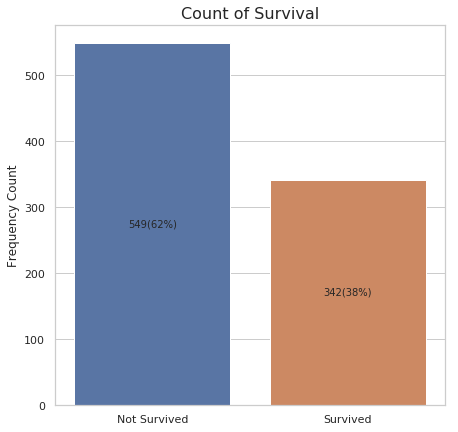

In [7]:
figure, survive_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["Survived"].value_counts().index, y = train["Survived"].value_counts(), ax = survive_bar)
survive_bar.set_xticklabels(['Not Survived', 'Survived'])
survive_bar.set_ylabel('Frequency Count')
survive_bar.set_title('Count of Survival', fontsize = 16)

for patch in survive_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    survive_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train.Survived))+')',
               horizontalalignment='center', verticalalignment='center')

The survive_bar plot gives you the information that 62% of the passengers died.

#### **Embarked Count**

[Text(0, 0, 'Southampton'), Text(0, 0, 'Chernboug'), Text(0, 0, 'Queenstown')]

Text(0, 0.5, 'Frequency Count')

Text(0.5, 1.0, 'Where did the passengers board the Titanic?')

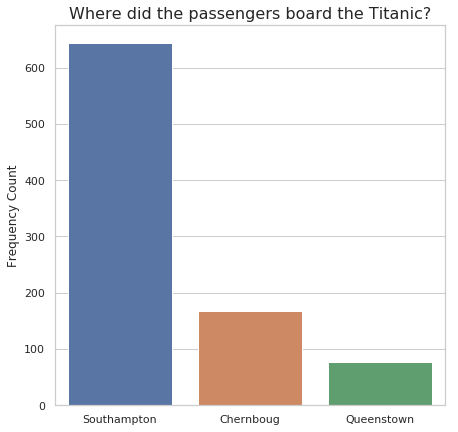

In [8]:
figure, embarked_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["Embarked"].value_counts().index, y = train["Embarked"].value_counts(), ax = embarked_bar)
embarked_bar.set_xticklabels(['Southampton', 'Chernboug', 'Queenstown'])
embarked_bar.set_ylabel('Frequency Count')
embarked_bar.set_title('Where did the passengers board the Titanic?', fontsize = 16)

Some interesting observations is that most of the passengers boarded from Southampton. 

#### CODING classes gather here! 
I always thought that knowing how to make your graphs neater is a good skill to have. Let us try,

#### Category variables count

The below plot is very useful:


1. We first create a plot grid, with subplots on it, we define the figure size as usual, and now we pass some more conditions in it, we want to make plot multiple graphs on a grid of say 2 by 3 grid. In this way, if your code consists of repetitive graphing of a bar chart in the same fashion, we can just run a loop on this grid! 

2. For example, we want to plot a very simple frequency count for titanic's categorical variables, namely, survived, pclass, sex, sibsp, parch and embarked. So we can run the below code.

3. Note for (u,v,z) in [["Survived",0,0],["Pclass",0,1],["Sex",0,2], ["SibSp",1,0], ["Parch",1,1],["Embarked",1,2]] just means for each element (u,v,z) in the list, we have u,v,z corresponding to each cross product in the list. Note, to say it explicitly, u is "survived", "pclass", etc.. v =0,1,2,..., z = 0,1,2,...

    Now I am telling you that you need to pass 3 elements (u,v,z) in the for loop, but when you are creating the code the first time, you may not realise at first, so the computational thinking is you write out the codes like how you would manually:
    
    -sns.barplot(x = train["Survived"].value_counts().index,y = train["Survived"].value_counts(), ax  = myplot[0,0])
    -sns.barplot(x = train["Pclass"].value_counts().index,y = train["Pclass"].value_counts(), ax  = myplot[0,1])
    -sns.barplot(x = train["Sex"].value_counts().index,y = train["Sex"].value_counts(), ax  = myplot[0,2])
    etc...
    
    So I suspect you need to loop through the categorical variables, survived, pclass, sex etc. And of course since you are plotting your graph on a 2x3 grid, we let our first graph appears in the place [0,0], second graph appears in the place [0,1], etc... So we want to loop through 3 things! So I should tell myself I need 3 elements to loop through in the for loop. And to do that it is now easy to see why I said: for (u,v,z) in [["Survived",0,0],["Pclass",0,1],...], However the [[..],[..],...] is hardcoded, but hey it is a good start to slowly cultivate your programming logic. 
    
   I added on a bit of matplotlib codes, which should be relatively googlable, just want to add the same set of features onto each of my graph on myplot[v,z]. Lastly, adjust is to make some spacing between each graphs, I am very particular about visuals, although I am not very good at it yet.

Text(0.5, 0, '')

Text(0.5, 1.0, 'Survived Titanic')

Text(0, 0.5, 'Count')

Text(0.5, 0, '')

Text(0.5, 1.0, 'Pclass Titanic')

Text(0, 0.5, 'Count')

Text(0.5, 0, '')

Text(0.5, 1.0, 'Sex Titanic')

Text(0, 0.5, 'Count')

Text(0.5, 0, '')

Text(0.5, 1.0, 'SibSp Titanic')

Text(0, 0.5, 'Count')

Text(0.5, 0, '')

Text(0.5, 1.0, 'Parch Titanic')

Text(0, 0.5, 'Count')

Text(0.5, 0, '')

Text(0.5, 1.0, 'Embarked Titanic')

Text(0, 0.5, 'Count')

Text(0.0, 274.5, '549(62%)')

Text(1.0, 171.0, '342(38%)')

Text(0.0, 108.0, '216(24%)')

Text(1.0, 92.0, '184(21%)')

Text(2.0, 245.5, '491(55%)')

Text(0.0, 288.5, '577(65%)')

Text(1.0, 157.0, '314(35%)')

Text(0.0, 304.0, '608(68%)')

Text(1.0, 104.5, '209(23%)')

Text(2.0, 14.0, '28(3%)')

Text(3.0, 8.0, '16(2%)')

Text(4.0, 9.0, '18(2%)')

Text(5.0, 2.5, '5(1%)')

Text(6.0, 3.5, '7(1%)')

Text(0.0, 339.0, '678(76%)')

Text(1.0, 59.0, '118(13%)')

Text(2.0, 40.0, '80(9%)')

Text(3.0, 2.5, '5(1%)')

Text(4.0, 2.0, '4(0%)')

Text(5.0, 2.5, '5(1%)')

Text(6.0, 0.5, '1(0%)')

Text(0.0, 322.0, '644(72%)')

Text(1.0, 84.0, '168(19%)')

Text(2.0, 38.5, '77(9%)')

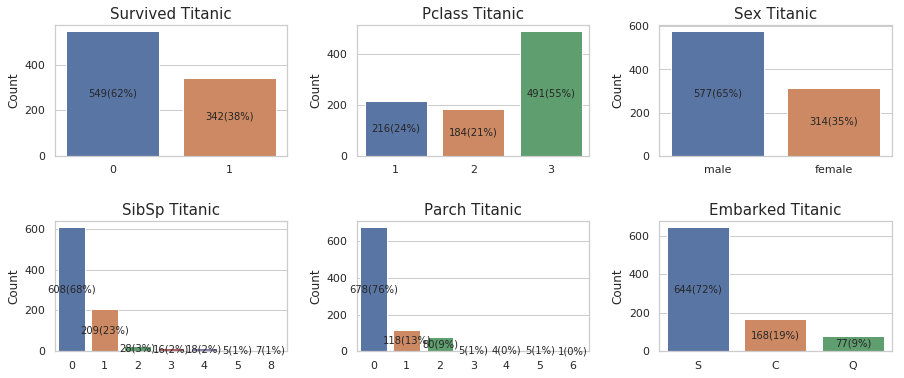

In [9]:

fig, myplot = plt.subplots(figsize = (15,6), nrows = 2,ncols = 3)

categorical_features = ["Survived","Pclass","Sex","SibSp","Parch","Embarked"]

row, col, num_cols = 0,0,3

for u in categorical_features:
    sns.barplot(x = train[u].value_counts().index,y = train[u].value_counts(), ax  = myplot[row, col])
    myplot[row, col].set_xlabel("")
    myplot[row, col].set_title(u + " Titanic", fontsize = 15)
    myplot[row, col].set_ylabel("Count")
    col = col + 1
    if col == 3:
        col = 0
        row = row + 1


plt.subplots_adjust(hspace = 0.5)
plt.subplots_adjust(wspace = 0.3)
# i put roundbracket around x,y,z to make more sense. just like how x \in [1,2,3] and if x is a tuple or bracket
#we have   u \in [(1,2,3),(2,3,5),...] where u = (x,y,z)

#for each patch in each graph from [0,0] to [1,2], we want to do the following...
for v in range(2):
    for z in range(3):
        for patch in myplot[v,z].patches:
            label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
            label_y = patch.get_y() + patch.get_height()/2
            myplot[v,z].text(label_x, label_y, 
                             str(int(patch.get_height())) + '('+'{:.0%}'.format(patch.get_height()/len(train.Survived))+')',
                            horizontalalignment='center', verticalalignment='center')


**Age Distribution**

Age is a variable that we can create bins for, but that will be another topic for another time. For now, let us look at the distribution and see what the distribution is. But be reminded, the distribution we are showing here is the training data set, whereby there are 177 missing ages supposedly. We **have not account for the missing values**. We call this plot **preimputation**. We will definitely come back to this plot later to compare when we have imputed the missing values of age.

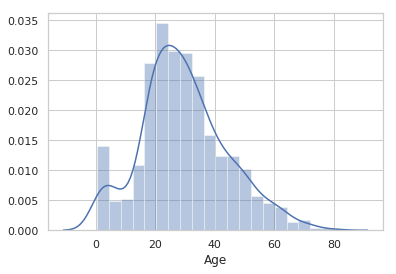

In [10]:
null_ages = pd.isnull(train.Age)
known_ages = pd.notnull(train.Age)
preimputation = train.Age[known_ages]
sns.distplot(preimputation)
#here we show a distribution of ages before imputation.

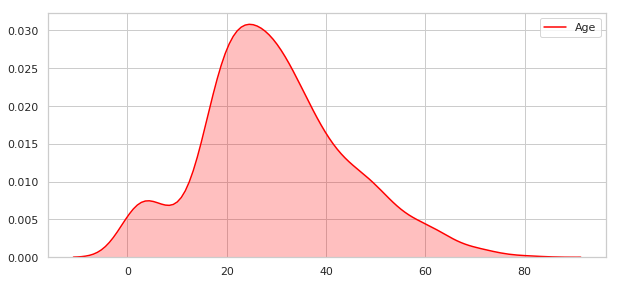

In [11]:
# Explore Age distibution as a whole
figure, myaxis = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train["Age"], kernel='gau', ax=myaxis, color="Red", shade=True, legend=True)

#### **Correlation Heatmap**

We shall do a correlation Heatmap to visualize which variables are more correlated with each other, in most context, correlation can help in predicting one attribute from another, which is a great way to impute missing values (we do have a lot of missing values and we will see some examples later). Of course, in regression wise, correlation matrix can be used to detect multi collinearity or say outliers.


By default, sns.heatmap will not include categorical features which are not factorized. As a result, the heatmap below did not include those categorical variables, only the columns with numerical are plotted against each other.

So since some categorical variables are not inside this map, we need to view their correlation with the other variables seperately. For example, our earlier plot suggests that "sex/gender" being female has a higher survival rate than males. Note that it is difficult to compare correlation of categorical and continuous variables and hence it brings up to the next section - where we plot more graphs to attempt to obtain an intuition between all the variables.

(7, 0)

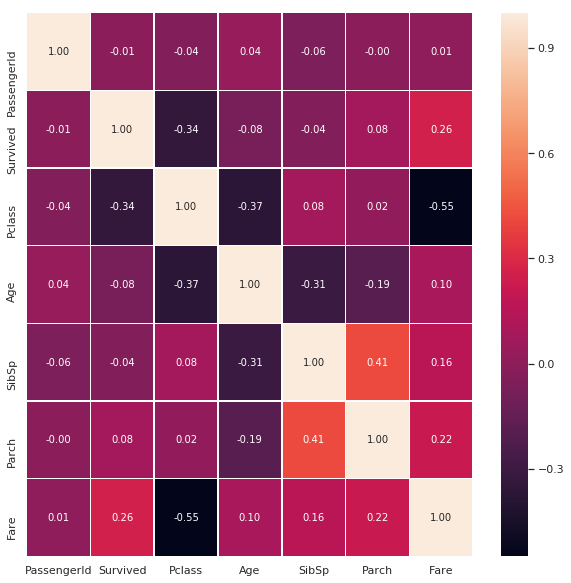

In [12]:
#Heatmap to observe correlation
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, linewidths=0.5, fmt='.2f',ax=ax)
ax.set_ylim(7, 0)

### 3.2) Plot variables against Survived  <a id="survive"></a>

Note that one should see that Name, Ticket, PassengerID will not play any crucial role in predicting the survival rate.
Hence I do not want to analyse them, later I will drop them. However, after reviewing many kernels by other experienced data analysts, we can do some feature engineering with Name - We will mention it later. We will do some basic overview of the survival rate in different categories.

In [13]:
def print_percentage(df,col_name,col_values):
    for x in col_values:
        group = df.loc[df[col_name]==x]
        print ('{0} survival rate: {1:.3f}'.format(x, (group['Survived'].sum()/group.shape[0])))

### 3.2.1) Plot Gender against Survived  <a name="gender"></a>

In [14]:
print_percentage(train,'Sex',["male","female"])

male survival rate: 0.189
female survival rate: 0.742


The code below is useful to understand if you want to plot a barplot using Seaborn package, you should compare and contrast that different seaborn plots use different coding methods.

1. As usual we specify the plot size in the first line and name our axis myaxis.


2. This is sns.barplot, so we look at the parameters inside.


3. First we use our data = train and extract x = Sex column and y = Survived column. Next the underlying idea is to group the data by sex, so there are male and female. Then in each category of male and female, there are the survived or not by the "Survived column" represented by 0 and 1. Our estimator = np.mean = function mean and that means, for each category male and female, calculate their MEAN survived; for example there are 2 male with 0,1 and 3 females with 1,0,1, and by applying the estimator mean we have (0+1)/2 = 0.5 and (1+0+1)/3 = 2/3 which means 50% of the males survived and 66.6% of the females survived. In this case we got lucky cause survive column is only 0 and 1 ; In which case the mean of the survival rate of male and female is literally just the proportion of male, female who survived the titanic. 

    If I tweak the example just now to some other number like let survive = 2 and not survived = 3 then we will have (2+3)/2 = 2.5 and (3+2+3)/3 = 2.66 and those become 250% and 266% which are not meaningful. So do be careful.
    

4. It is fairly obvious that female has a much higher survival chance than men.


5. The second count plot shows the actual distribution of male and female passengers that survived and did not survive. It shows that among all the females 233 survived and 314-233 = 81 did not survive. While among male passengers 109 survived and 577-109 = 468 did not survive. Also, male survival rate is only 18.9 percent while female survival rate is 74.2 percent. This indicates quite a correlation between gender and survival rate.

Text(0.5, 1.0, 'Survived/Non-Survived Passenger Gender Distribution')

Text(0.5, 0, 'Sex')

Text(0, 0.5, 'Proportion of passengers survived')

Text(0.0, 0.09445407279029462, '18.891%')

Text(1.0, 0.37101910828025475, '74.204%')

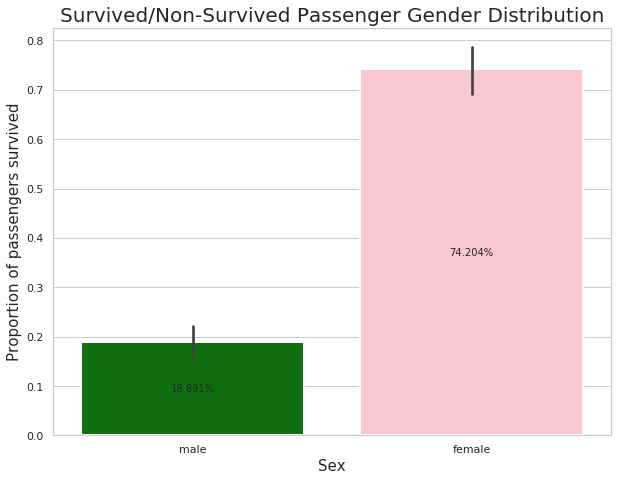

In [15]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))


sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train, 
            ax = myaxis,
            estimator = np.mean,
            palette = {'male':"green", 'female':"Pink"},
            linewidth=2)

myaxis.set_title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 20)
myaxis.set_xlabel("Sex",fontsize = 15)
myaxis.set_ylabel("Proportion of passengers survived", fontsize = 15)

for patch in myaxis.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    myaxis.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
                '{:.3%}'.format(patch.get_height()),
               horizontalalignment='center', verticalalignment='center')

Text(0.5, 1.0, 'Passenger Gender Distribution - Survived vs Not-survived')

Text(0.5, 0, 'Sex')

Text(0, 0.5, 'Number of Passenger Survived')

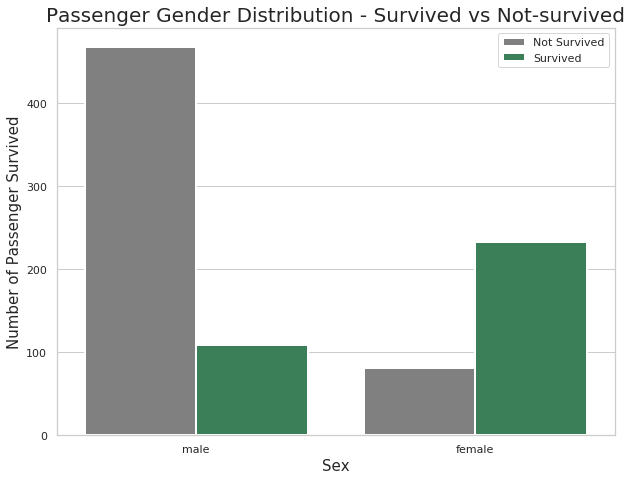

In [16]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)


## Fixing title, xlabel and ylabel
myaxis.set_title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Sex", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')

At this step, we can actually build a **baseline model** such that we predict all women survived and all men died. Or we can predict that every time we encounter a unseen data, we predict 74% of the women survived and 18 of the men died. In both cases, we are just using the 2 hypothesized model as baselines - any other models must perform better than this. Note that if you read the Titanic overview, they gave you a excel file where the output is predicted just by assuming all women survived.

<br>

Also, we retrospectively knew that women and child are prioritized to board the safety boat back then and thus explains the reason that female has such a high survival rate. In reality, if we are given a real world problem, it is our job to establish some plausible explanation that female has a much more significant survival rate than men - and that needs further digging.


### 3.3.2) Plot Pclass against Survived  <a id="pclass"></a>

**https://seaborn.pydata.org/generated/seaborn.pointplot.html**

In [17]:
print_percentage(train,'Pclass',[1,2,3])

1 survival rate: 0.630
2 survival rate: 0.473
3 survival rate: 0.242


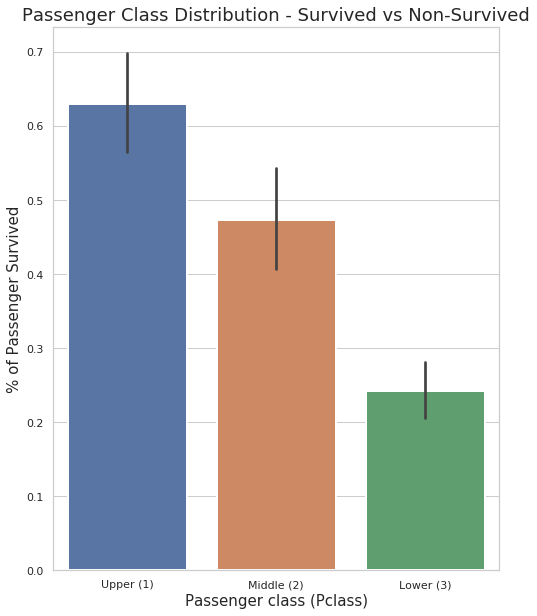

In [18]:
#Plot 1: We can use a bar plot:

figure, pclass_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = pclass_bar,
            linewidth=2)
pclass_bar.set_title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 18)
pclass_bar.set_xlabel("Passenger class (Pclass)", fontsize = 15);
pclass_bar.set_ylabel("% of Passenger Survived", fontsize = 15);
labels = ['Upper (1)', 'Middle (2)', 'Lower (3)']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
pclass_bar.set_xticklabels(labels);




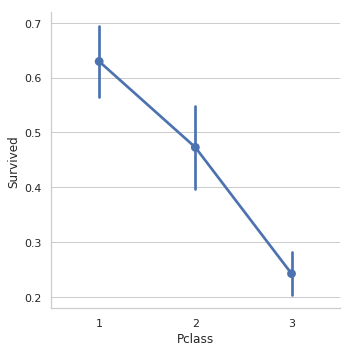

In [19]:
#Plot 2: We can use a line plot:
sns.catplot('Pclass', 'Survived', kind='point', data=train)


Bear in mind, we can use plot 1 when our categorical pclass does not have many categories/levels. What if pclass has 30 different levels. Then our graph will look messy. This is why I also used a line plot in plot 2 to illustrate that line plot can be a useful visualization tool as well.

<br>

From the above 2 plots, we have the same conclusion, in Pclass 1, 63 percent of the passengers in Pclass 1 survived. In Pclass 2, 47.3 percent of passengers in Pclass 2 survived. In Pclass 3, 24.2 percent of Pclass 3 passengers survived. **So we have a feel that the the better your class, the higher your chance of survival.**

<br>

But do recall in our first part 3.3.1, we did see that gender DO affect one's chance of survival. We can further confirm our hypothesis by plotting Gender + Pclass vs Survival Rate.

<br>

**How many men and women survived grouped by their Passenger Class?**

Here is a neat code from https://www.kaggle.com/poonaml/titanic-survival-prediction-end-to-end-ml-pipeline to plot this.

One may ask what can we get from this plot? Well for a start, we do know that women has a much higher survival rate than men, so is this still true if we categorize them by different Pclass? Apparently, you will see later that for Pclass 1 and 2, women still maintain a very high survival rate, but in Pclass 3, we can see the women's survival rate dip down by quite a lot. This may suggest Pclass 3 is the "poorer" people's class - and hence they are valued less when evacuating (unfortunately life is unfair).

Also note that we can see in a correlation heatmap, fare and pclass are quite strongly correlated with a value of 0.55. So we reckon higher fare corresponds to Pclass 1.


<br>

One side note on the coding part below: catplot returns you a function called g which is a FacetGrid object with the plot on it for further tweaking. So the below code is how we usually add on different plottings on the facetgrid itself. Note there is a difference between the way we did on barplot, on barplot it returns you a function called ax which is a single grid.


Text(0.5, 0.98, 'How many Men and Women Survived by Passenger Class')

Text(0.0, 0.18442622950819673, '36.885%')

Text(1.0, 0.48404255319148937, '96.809%')

Text(0.0, 0.0787037037037037, '15.741%')

Text(1.0, 0.4605263157894737, '92.105%')

Text(0.0, 0.06772334293948126, '13.545%')

Text(1.0, 0.25, '50.000%')

Text(-0.2, 0.18442622950819673, '36.885%')

Text(0.8, 0.0787037037037037, '15.741%')

Text(1.8, 0.06772334293948126, '13.545%')

Text(0.2, 0.48404255319148937, '96.809%')

Text(1.2, 0.4605263157894737, '92.105%')

Text(2.2, 0.25, '50.000%')

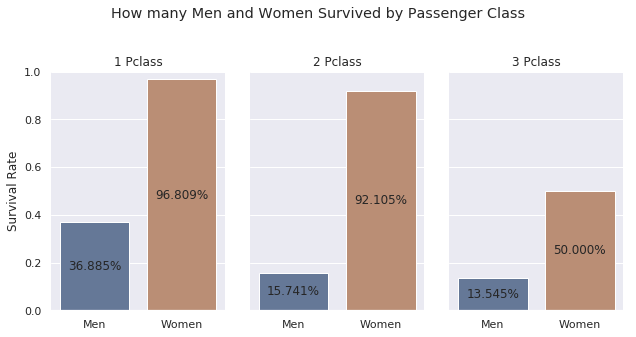

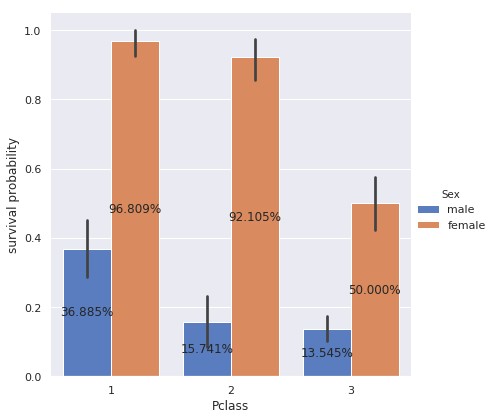

In [20]:
sns.set(font_scale=1)
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                    data=train, saturation=.5,
                    kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

for myaxis in g.axes[0]:
    for patch in myaxis.patches:
        label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
        label_y = patch.get_y() + patch.get_height()/2
        myaxis.text(label_x, label_y,
                    #left - freq below - rel freq wrt population as a percentage
                    '{:.3%}'.format(patch.get_height()),
                   horizontalalignment='center', verticalalignment='center')

#Another plot that gives the exact same result is as follows: It is good to know different variations.


g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

myaxis = g.ax
for patch in myaxis.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    myaxis.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
                '{:.3%}'.format(patch.get_height()),
               horizontalalignment='center', verticalalignment='center')

Factor/cat Plot is quite useful for comparing multiple levels. Please explore it. The above plots can be interpreted as follows: In Pclass 1, about 38 percent of the **male** survived, for all the female passengers in Pclass 1, more than 90 percent of the **female** survived! 

<br>

Similarly, we can find the trend for Pclass 2 and Pclass 3. 

<br>

A good conclusion we can make is: Female in Pclass 1 and 2 have a very high survival rate of 90 percent while their male counterparts are significantly lesser. All passengers in Pclass 3 have a low survival rate. My hypothesis is that male in general has a low survival rate irregardless of their Pclass.

### 3.2.3) Plot Embarked against Survived  <a id="embarked"></a>

Now we do an EDA on Embarked vs Survival Rate.

In [21]:
print_percentage(train,'Embarked',['S','C','Q'])

S survival rate: 0.337
C survival rate: 0.554
Q survival rate: 0.390


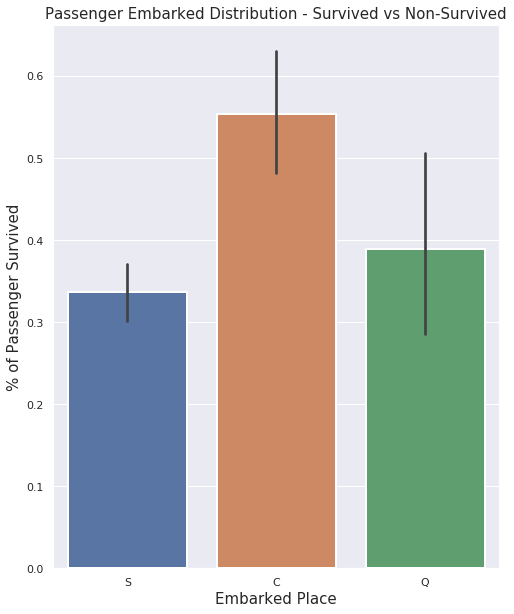

In [22]:
figure, embarked_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Embarked", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = embarked_bar,
            linewidth=2)
embarked_bar.set_title("Passenger Embarked Distribution - Survived vs Non-Survived", fontsize = 15)
embarked_bar.set_xlabel("Embarked Place", fontsize = 15);
embarked_bar.set_ylabel("% of Passenger Survived", fontsize = 15);



The above 2 plots showed that passengers boarding from Cherbourg (C) has a better chance of survival. However, one should always question what a graph gives you; In this case, it is not **immediately obvious** why a boarding place has anything to do with one's **survival rate**. A statistical visualization can only bring you this far, it is now your turn to dig out why. (Of course, it may be entirely random that the survivors embarked from Cherbourg).

<br>

**Hypothesis:** As far as our analysis went, it is reasonable to assume that female has a better survival rate than male. Also we have reasonable evidence to think that people with higher Pclass have a higher survival rate. So maybe Cherbourg is a **"better"** city than the other 2 such that most passengers boarding from Cherbourg has a higher Pclass than the rest of the city. Or it could be that Cherbourg has a higher Female:Male ratio and thus most people that embarked from Cherbourg are females? We shall test our hypothesis out.

<br>



**Pclass vs Embarked**


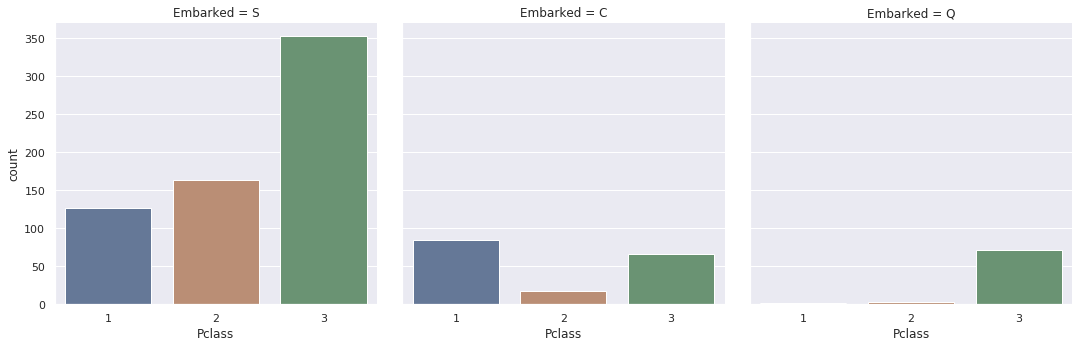

In [23]:
sns.set(font_scale=1)
g = sns.catplot(x="Pclass", col="Embarked",
                    data=train, saturation=.5,
                    kind="count", ci=None)

Indeed, Passengers embarked from Chersboug has a high **proportion** of Pclass 1. This may account for one of the reasons that passengers who boarded from Chersboug has a significantly higher suvival rate than the rest of the cities.

**Gender vs Embarked**

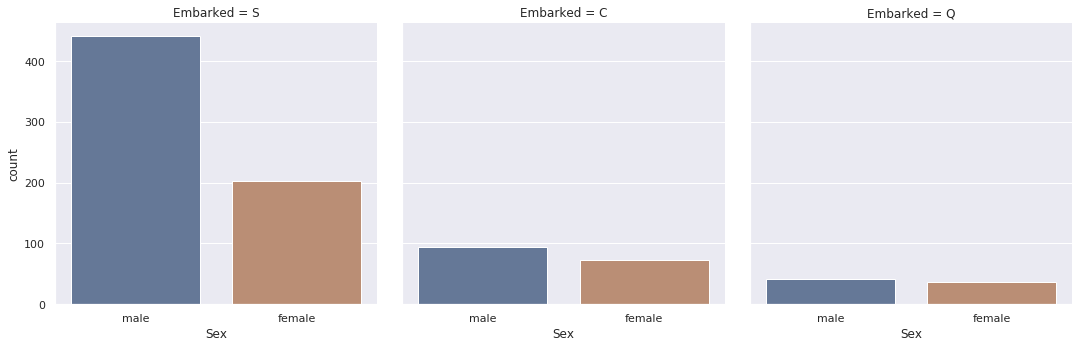

In [24]:
sns.set(font_scale=1)
g = sns.catplot(x="Sex", col="Embarked",
                    data=train, saturation=.5,
                    kind="count", ci=None)

Although this plot did not tell us anything informative on whether females play a role in why Chersboug has a higher survival rate, it did hint to us that why Southampton has the lowest survival rate. A good reason is that there is way more males embarked from Southampton than females. 

### 3.2.4) Plot Age against Survived  <a id="age"></a>

Now we do an EDA on Age vs Survival Rate. Age is a continuous variable, and we should not use bar chart here. I present one of the way to plot a KDE distribution below, where you superimpose the age plot for survived and the age plot for not survived. The idea of the code is you first plot the age plot for not survived, and then you plot the age plot for survived on the same axis: ax = myaxis, then the graph will present both graphs on the same grid.  

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for age of Survived and Not Survived')

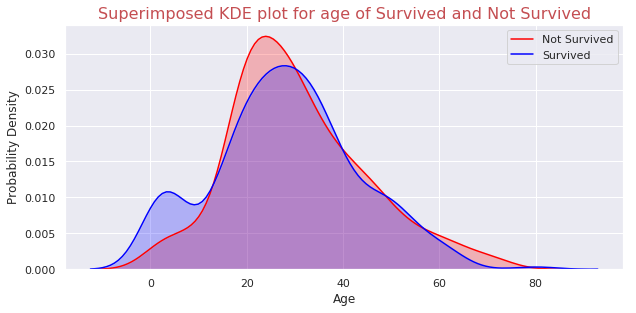

In [25]:
# Explore Age distibution
figure, myaxis = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Red", shade=True, legend=True)


# a faster code using loc function is sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')

sns.kdeplot(data=train["Age"][(train["Survived"] == 1) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)

myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["Not Survived", "Survived"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

The above plot shows the age vs survival rate, represented by a density plot; for survivors and non survivors, the distribution seems to be similar. However, for survivors we see an obvious local maximum at around 0-5 years old, indicating small children has a higher survival rate. **Reminder: This distribution is before filling in the missing values of age.**

Below are some more visualizations graphs.

Text(0.5, 0.98, 'Survived by Sex and Age')

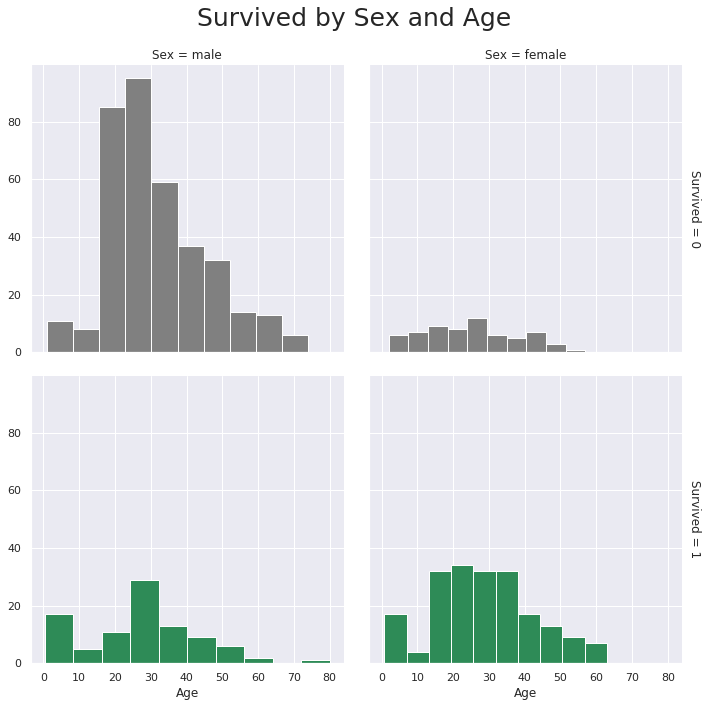

In [26]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

Text(0.5, 0.98, 'Survived by Sex and Age')

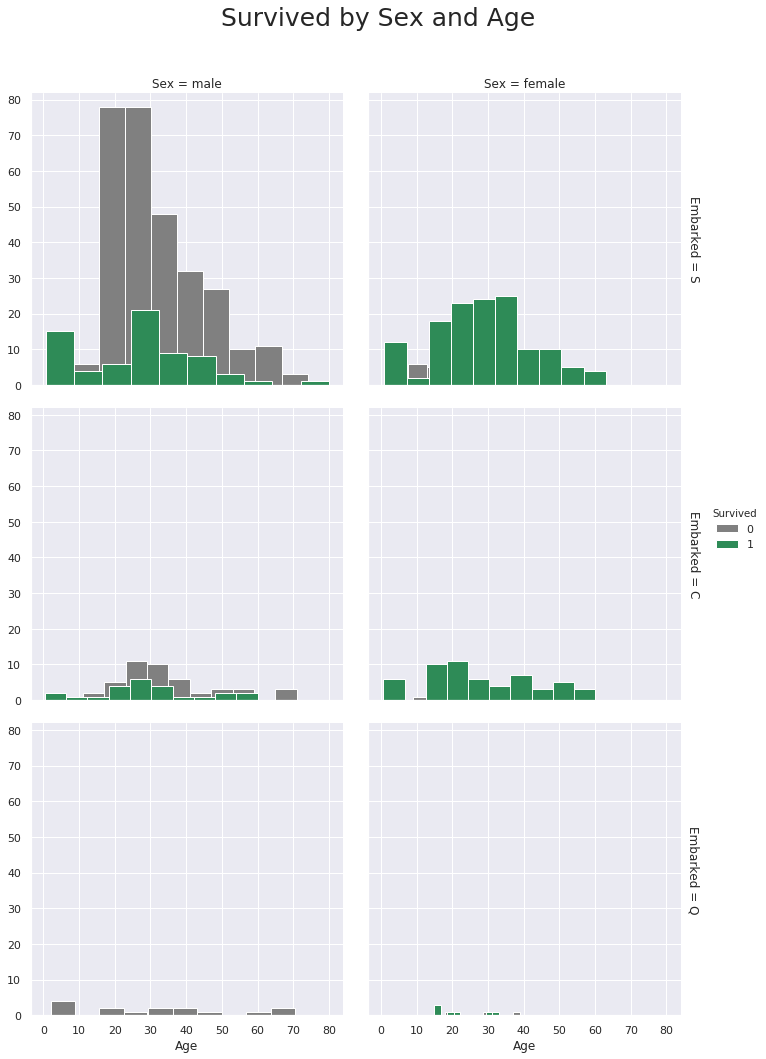

In [27]:
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

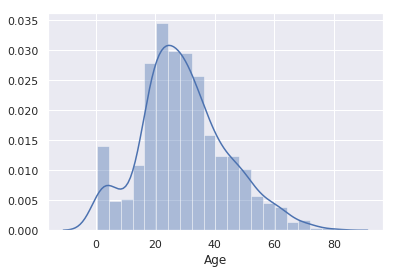

In [28]:
null_ages = pd.isnull(train.Age)
known_ages = pd.notnull(train.Age)
preimputation = train.Age[known_ages]
sns.distplot(preimputation)

### 3.2.5) Plot Fare against Survived  <a id="fare"></a>


Fare is a continuous variable, so it is good to plot a histogram or a KDE to see the distribution.

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for Fare of Survived and Not Survived')

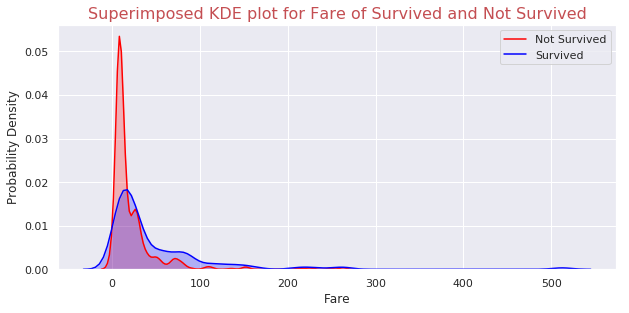

In [29]:
# Explore Age distibution
figure, fare = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train.loc[(train['Survived'] == 0),'Fare'], kernel='gau', ax=fare, color="Red", shade=True, legend=True)

sns.kdeplot(data=train.loc[(train['Survived'] == 1),'Fare'], kernel='gau', ax=fare, color="Blue", shade=True, legend=True)

fare.set_xlabel("Fare")
fare.set_ylabel("Probability Density")
fare.legend(["Not Survived", "Survived"], loc='upper right')
fare.set_title("Superimposed KDE plot for Fare of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed distribution plot for Fare of Survived and Not Survived')

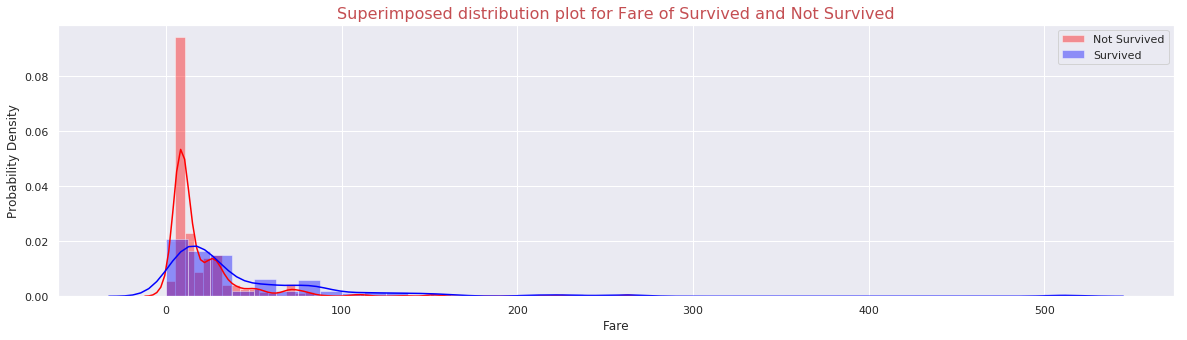

In [30]:
figure, fare = plt.subplots(figsize=(20, 5))
sns.distplot(train.loc[(train['Survived'] == 0),'Fare'], hist=True, color='red', ax=fare)
sns.distplot(train.loc[(train['Survived'] == 1),'Fare'], hist=True, color='blue', ax=fare)

fare.set_xlabel("Fare")
fare.set_ylabel("Probability Density")
fare.legend(["Not Survived", "Survived"], loc='upper right')
fare.set_title("Superimposed distribution plot for Fare of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

After a brief look at the distribution of both the age and fare plots, we do realise that the graph is not **smooth**, we can say that the graph has splitting and spiking points. In which it may be suggesting to us that if we were to apply a tree algorithm later, these 2 features will play a significant importance (henceforth we shall include them). See! EDA is useful! It gives us an intuition of what algorithms to use even before we start. Credits to https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic - a wonderfully tailored kernel for beginners.

### 3.2.6) Plot Parch, SibSp against Survived  <a id="fare"></a>

In [31]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Notice that for Parch, people travelling with 3,4,5,6 parents/children aboard are very little. And thus, the barplot representing their survival percentage may cloud your judgement. As can be seen below, there is 0% of people who survived with 6 Parch, but this is because there is only literally 1 person who travelled on board with 6 parents/children; and 1 person is too small a sample size to conclude anything useful. Here I am open to comments on how to deal with issues like this, when some of the categorical levels have too little people to be indicate any underlying pattern. And hence to get the full picture, it is often good to plot a simple count graph so as to not get misled by mere percentages - a mistake some beginners might make.

In [32]:
print_percentage(train,'Parch',[0,1,2,3,4,5,6])

0 survival rate: 0.344
1 survival rate: 0.551
2 survival rate: 0.500
3 survival rate: 0.600
4 survival rate: 0.000
5 survival rate: 0.200
6 survival rate: 0.000


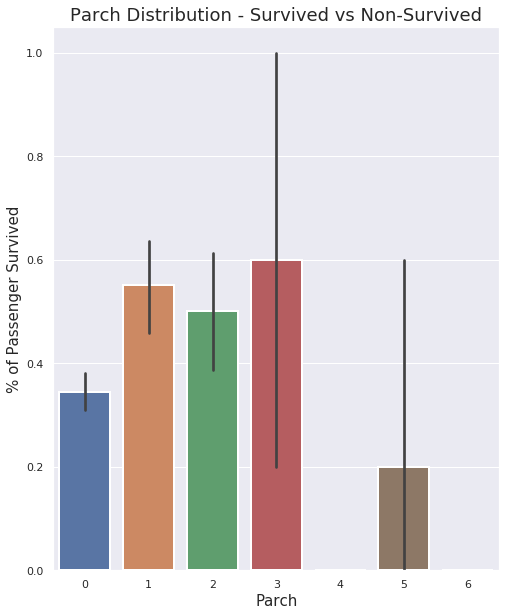

In [33]:
figure, parch_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Parch", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = parch_bar,
            linewidth=2)
parch_bar.set_title("Parch Distribution - Survived vs Non-Survived", fontsize = 18)
parch_bar.set_xlabel("Parch", fontsize = 15);
parch_bar.set_ylabel("% of Passenger Survived", fontsize = 15);

Text(0.5, 1.0, 'Passenger Parch Distribution - Survived vs Not-survived')

Text(0.5, 0, 'Parch')

Text(0, 0.5, 'Number of Passenger Survived')

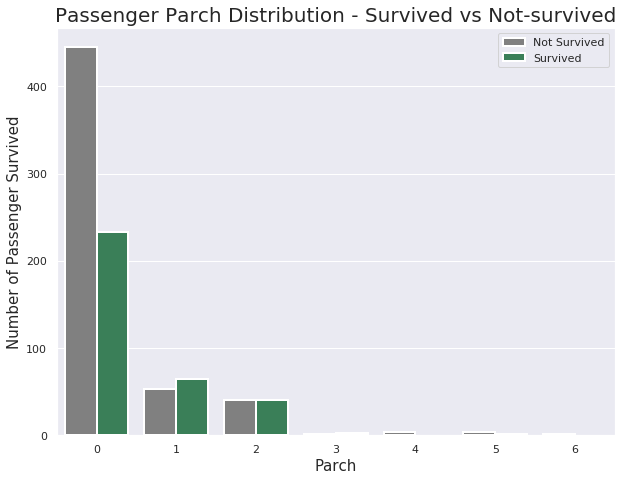

In [34]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "Parch", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)


## Fixing title, xlabel and ylabel
myaxis.set_title("Passenger Parch Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Parch", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')

In [35]:
# sns.set(font_scale=1)
# g = sns.catplot(x="SibSp", y="Survived", col="Parch",
#                     data=train, saturation=.5,
#                     kind="bar", ci=None, aspect=.6)
# (g.set_axis_labels("", "Survival Rate")
#     .set_xticklabels(["Men", "Women"])
#     .set_titles("{col_name} {col_var}")
#     .set(ylim=(0, 1))
#     .despine(left=True))  
# plt.subplots_adjust(top=0.8)
# g.fig.suptitle('How many Men and Women Survived by Passenger Class');



In [36]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [37]:
print_percentage(train,'SibSp',[0,1,2,3,4,5,8])

0 survival rate: 0.345
1 survival rate: 0.536
2 survival rate: 0.464
3 survival rate: 0.250
4 survival rate: 0.167
5 survival rate: 0.000
8 survival rate: 0.000


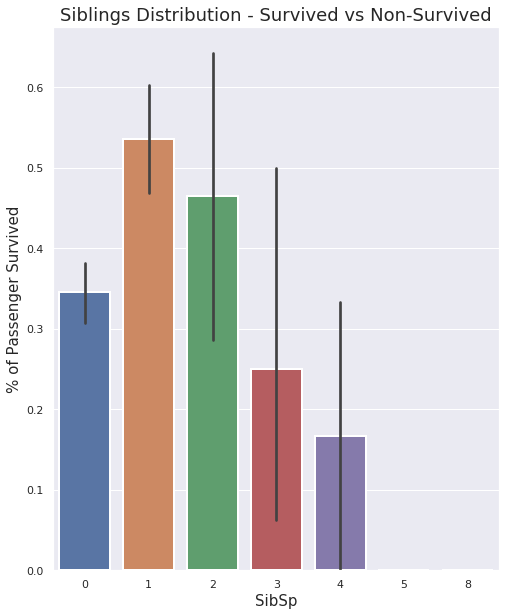

In [38]:
figure, parch_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "SibSp", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = parch_bar,
            linewidth=2)
parch_bar.set_title("Siblings Distribution - Survived vs Non-Survived", fontsize = 18)
parch_bar.set_xlabel("SibSp", fontsize = 15);
parch_bar.set_ylabel("% of Passenger Survived", fontsize = 15);

Text(0.5, 1.0, 'Siblings Distribution - Survived vs Not-survived')

Text(0.5, 0, 'Siblings')

Text(0, 0.5, 'Number of Passenger Survived')

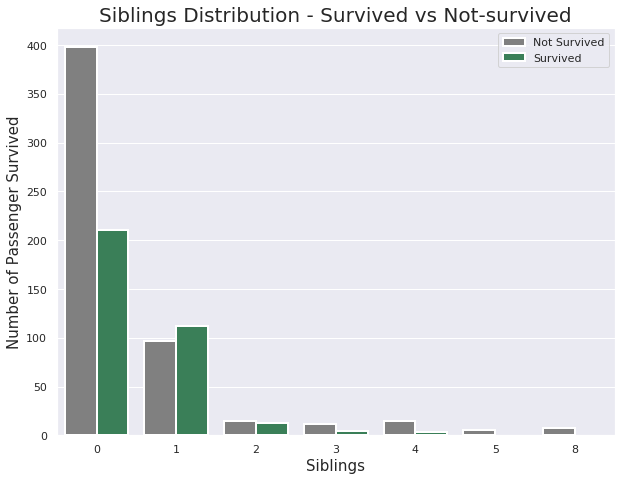

In [39]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "SibSp", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)


## Fixing title, xlabel and ylabel
myaxis.set_title("Siblings Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Siblings", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')

One thing is for sure when I read the above few graphs, that is passengers who travelled alone seems to have a lower survival rate than the others.

**Conclusion of EDA**

Continuous Features: There are 2 continuous features Age and Fare, where we see that split points and spikes are present in the graph, unfortunately, there are only 2 of them so we cannot drop them or alter too much. They can be captured easily with a decision tree algorithm, but neural networks may not be able to spot them. (source: https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic One has to be experienced to do something like his). 

<br>

Categorical Features: As we can see, most of the categorical feature has classes that indicates significant survival/non-survival rate. This is a tell tale sign that one-hot encoding may be quite useful here. But also, this project has little categorical variables, and thus one hot encoding usage is not put down by the possible "curse of dimension".

## 4) **Feature Engineering/Selection** <a id="eng"></a>

https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

**"Garbage into Machine Learning Algorithm, Garbage out of the Algorithm!"**

<br>

Machine Learning Algorithm is only as smart as it's owner can get. As the owners of the algorithms, we need to choose carefully what features (inputs) we feed into the algorithm. If we decide to feed in some irrelevant or "noisy" features, then our algorithm may malfunction and produce bad results. 

<br>

For example, in our titanic dataset, we see passengerID column and decide to feed in blindly, the machine may really think there is an underlying pattern among the passengerIDs and train the algorithm to adapt to the "non-existence pattern". This may cause overfitting, and when we apply our algorithm to a new unseen data with passengerIDs (possibly with different passengerIDs), then our algorithm will perform badly!

<br>

Basically, all machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristic to work properly. Here, the need for feature engineering arises. I think feature engineering efforts mainly have two goals:

a) Preparing the proper input dataset, compatible with the machine learning algorithm requirements.

b) Improving the performance of machine learning models.

<br>

Here we will introduce a few feature engineering techniques, but may or may not go through all as this kernel is update in progress.



### 4.1) Imputation <a id="imp"></a>

It is extremely annoying when your data sets have missing values. It is not wise to just delete them, or blindly replace them with the median/mean/mode. (Without knowing why the data is missing in the first place, we are unable to come up with a foolproof method for imputing the missing data). One could check some of the links here.

http://www.stat.columbia.edu/~gelman/arm/missing.pdf

https://www.kaggle.com/shashankasubrahmanya/missing-data-imputation-using-regression/notebook

https://statisticsglobe.com/regression-imputation-stochastic-vs-deterministic/

https://www.kaggle.com/caicell/statistical-modeling-imputation-outliers/notebook#3.-Imputation-and-Outliers

And today we are going to talk about a few ways of handling missing data, however, there are a lot of methods, and we shall not be greedy and attempt to understand all in one single session.

Also, bear in mind that filling in missing values may not just necessary mean filling in values that are not present. We should however be aware that certain data entries automatically convert NA/NAN values to 0. Therefore, even if you use df.isnull() to check and found that **there are no missing values**, that does not mean imputation is not needed. So a good habit is also to check if the numbers make sense or not. For example, if we are modelling the height of New York people and there are many peoplewith height 0 cm, then it does not even make sense to begin with (although if you use isnull it will not show), so sometimes you have to be sharp and spot outlier values, and either remove them or impute them.

**Some users said that it is convenient to work on concatenated training and test set while dealing with missing values, otherwise the filled data may overfit to separate training or test sets. I welcome people to discuss in the comments section on this. However, note for the parts below, I will not use the concatenated set to impute missing values.**

The amount of missing values in Age, Embarked and Fare features are relatively smaller compared to the total samples, but roughly 80% of the Cabin feature is missing. Missing values in Age, Embarked and Fare features can be filled with descriptive statistical measures, but that wouldn't work for Cabin feature. 




### Good Advice

I had a good read from volhaleusha's kernel regarding on imputation: https://www.kaggle.com/volhaleusha/titanic-tutorial-encoding-feature-eng-81-8. The following long wall of text is extracted from various sources/kernels.

<br>

In the dataset Age, Embarked, Fare and Cabin features have missing values.  

There are multiple ways to deal with missing values in dataset and chosen strategy highly depends on type feature type, amount of missing values, size of dataset and etc.  


**Missing - Data Mechanism**

To decide how to handle missing data, it is helpful to know why they are missing. We consider four general “missingness mechanisms,” moving from the simplest to the most general.



<br>

**Suppose you are modelling weight (Y) as a function of sex (X). Some respondents wouldn't disclose their weight, so you are missing some values for Y. There are three possible mechanisms for the nondisclosure:**

1. **Missingness Completely At Random ( MCAR):** Missing completely at random (MCAR) is the only missing data mechanism that can actually be verified. When we say data are missing completely at random, we mean that the missingness has nothing to do with the person being studied. For example, a questionnaire might be lost in the post, or a blood sample might be damaged in the lab. Of course, this is not **completely random**, but the underlying idea is the missing data is not related to the subject of the missing data. https://cpb-us-w2.wpmucdn.com/blog.nus.edu.sg/dist/4/6502/files/2018/06/mcartest-zlxtj7.pdf

   There may be no particular reason at all why some respondents told you their weights and others didn't. That is, the probability that Y is missing may has no relationship to X or Y. In this case our data is missing completely at random (MCAR).

<br>


2. **Missing At Random (MAR):** Missing at random (MAR) means that the missingness can be explained by variables on which you have full information. It's not a testable assumption, but there are cases where it is reasonable vs. not.

   For example, take political opinion polls. Many people refuse to answer. If you assume that the reasons people refuse to answer are entirely based on demographics, and if you have those demographics on each person, then the data is MAR. It is known that some of the reasons why people refuse to answer can be based on demographics (for instance, people at both low and high incomes are less likely to answer than those in the middle), but there's really no way to know if that is the full explanation.

   So, the question becomes "is it full enough?". Often, methods like multiple imputation work better than other methods as long as the data isn't very missing not at random. https://stats.stackexchange.com/questions/23090/distinguishing-missing-at-random-mar-from-missing-completely-at-random-mcar

   One sex (maybe females haha :D) may be less likely to disclose its weight. That is, the probability that Y is missing depends only on the value of X. Such data are missing at random (MAR).

<br>

3. **Missing Not At Random (MNAR):** Heavy (or light) people may be less likely to disclose their weight. That is, the probability that Y is missing depends on the unobserved value of Y itself. Such data are not missing at random or missing not at random (MNAR) and requires attention or else it will heavily bias your inference.
 





<br>

**Possible solutions to deal with missing values in Continuous Variables (Refer to https://www.kaggle.com/volhaleusha/titanic-tutorial-encoding-feature-eng-81-8#Part-4:-Explore-Target-Variable):**

1. Complete Case Analysis CCA (discard observations where any value is missing in any variable) - doesn't work if there are many features missing or on small datasets. 
    <br>
    
2. Mean and median imputation (substitute missing values with mean feature value (for Gaussian features) and median (if a variable is not Gaussian) 
    - normally good strategy if data is missing completely at random
    - but if there is a dependency between why data is missing and target it is better to additionally create a separate variable to capture NAs
    - changes the original distribution of variable and can distort covariance with other variables $\to$ if too much can influence prediction in a negative way
    
      <br>
      
3. Random sampling imputation (to fill NAs - take a random observation from available observation)
    - preserves the original distribution of data, but can create randomness - treatment of the same sample differently or unfair
    
      <br>
      
4. Adding a separate variable to capture NAs 
    - useful in situations when data is not missing at random and there is some connection on why data is missing with a target or other variables
    - expands feature space as creates an additional feature 
    
      <br>
      
5. End of distribution imputation (replace NAs with values that are at the far end of the distribution)
    - shows the importance of missingness
    - but if missingness is not important can mask predictive power and distorts the original distribution
    
      <br>
      
6. Arbitrary value imputation (substitute with value away from other values in the variable -999, 999)
    - captures the importance of missing value
    - but creates outlier (it doesn't matter for trees)
    
      <br>
      
7. Build a model to impute missing values: KNN, linear regression, etc.
    - a very good estimate of missing data
    - but it can be a problem because prediction usually is too good and doesn't match reality

<br>

**Possible solutions to deal with missing values in categorical variables:**
1. CCA 
    - for pros and cons refer above
2. Random sample imputation
3. Adding a separate variable to capture NAs
4. Adding a separate category to capture NAs



<br>

1. If the data is MCAR:

   i) Complete case analysis is valid.

   ii) Mulitple imputation or any other imputation method is valid.
    
<br>

2. If the data is MAR:

   i) Some complete cases analyses are valid under weaker assumptions than MCAR. E.g. linear regression is unbiased if missingness is independent of the response, conditional on the predictors.

   ii) Multiple imputation is valid (it is biased, but the bias is negligible).
    
<br>

3. If the data is MNAR:

   i) You must model the missingness explicitly; jointly modeling the response and missingness.

   ii) In some specific cases (e.g. survival analysis), MNAR data (e.g. censored data) is handled appropriately.

   iii) Generally, we assume MAR whenever possible just to avoid this situation.








<br>

Besides referencing to some very good kagglers, I also accumulated some more good links to refer to:   
1. [Missing-data imputation](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)
2. [How to Handle Missing Data](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)
3. [Multiple Imputation](http://dept.stat.lsa.umich.edu/~jerrick/courses/stat701/notes/mi.html)
4. [Good example](http://onbiostatistics.blogspot.com/2012/10/missingness-mechanism-mcar-mar-and-mnar.html)
5. [A good answer](https://stats.stackexchange.com/questions/23090/distinguishing-missing-at-random-mar-from-missing-completely-at-random-mcar)

<br>

**LAST BUT NOT LEAST**

https://stats.stackexchange.com/questions/95083/imputation-before-or-after-splitting-into-train-and-test

I see quite a lot of people on Kaggle performing imputation on both the "Training" and "Test" datasets in one setting - i.e. If one wants to use the mean of the dataset to impute the missing values, instead of performing the desired imputation method on the training set first, and replicate the process to the test set, he/she combines the training and test set and perform the method on the combined set. This is confusing, to say the very least, as a newbie, I googled up and see some answers to this:

<br>

The division between training and test set is an attempt to replicate the situation where you have past information and are building a model which you will test on future as-yet unknown information: the training set takes the place of the past and the test set takes the place of the future, so you only get to test your trained model once.

<br>

Keeping the past/future analogy in mind, this means anything you do to pre-process or process your data, such as imputing missing values, you should do on the training set alone. You can then remember what you did to your training set if your test set also needs pre-processing or imputing, so that you do it the same way on both sets.

<br>

If you use the test data to affect the training data, then the test data is being used to build your model, so it ceases to be test data and will not provide a fair test of your model. You risk overfitting, and it was to discourage this that you separated out the test data in the first place.

<br>

So personally, given a situation where you want to perform, say, median imputation, I would strongly recommend to do it on the training and test set separately, instead of combining the two sets and do a median imputation on it.

**Another reasonable question that follows from the above**

What if the missing values only happen in the test set and not in the training set. What should we do then? Again, please have a discussion on this if you know the answer.

### 4.1.1) Missing Values: Fare <a id="fare"></a>

We first check the number of missing values for fare.

In [40]:
# Check variable Fare for missing values:
print('Amount of missing data in Fare for training set:', train.Fare.isnull().sum())
print('Amount of missing data in Fare for test set:', Test.Fare.isnull().sum())

Amount of missing data in Fare for training set: 0
Amount of missing data in Fare for test set: 1


Since the missing data is so little, it is therefore easy and feasible to check which passenger has a missing fare value. And a common way to impute missing data when the missing amount of data is small is presented as below.

In [41]:
Test[Test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


As said earlier, there are a few ways to fill in the missing data when the number of missing values are so small. It is reasonable to fill Fare's missing values with the median value.

Test['Fare'] = Test['Fare'].fillna(Test['Fare'].median())

<br>

However, we can be more observant here and see that Fare is related to Pclass and Parch in our correlation heatmap in the **training set**. So we can approach it this way: Assuming that the correlation holds for the Test set as well (we can check the heatmap of the test set as well, but I try to refrain myself from doing that), meaning that Fare is most related to Pclass and Parch in the Test set; Since Mr Thomas is of Pclass 3 and Parch 0, we thus focus on the passengers who are all from Pclass 3 and Parch 0 and take the median fare of those passengers who are all from Pclass 3 and Parch 0.

In [42]:
median_fare = Test.groupby(['Pclass', 'Parch']).Fare.median()[3][0]
# Filling the missing value in Fare with the median Fare of 3rd class passenger who has Parch 0.
Test['Fare'] = Test['Fare'].fillna(median_fare)

Since fare is all filled up, we compare the fare distribution as below. Also when you look carefully at the plot below, I compared the test and training set's distribution of Fare vs Survival rate side by side and realized that the training set is not so "smooth" as compared to the test set. This has an underlying problem, and the idea is that when our algorithm is searching for patterns in the training set, our algorithm might adapt to certain underlying patters in the training set that DO NOT exist in the test set  - as a result, the machine learning algorithm may not be able to generalize well to the test set - which is why when we use a certain algorithm on our training set, it seems to give us a high accuracy like 80% but when we do it on the test set, it becomes much lower at maybe 75%.

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed distribution plot for Fare of Training set vs Test set')

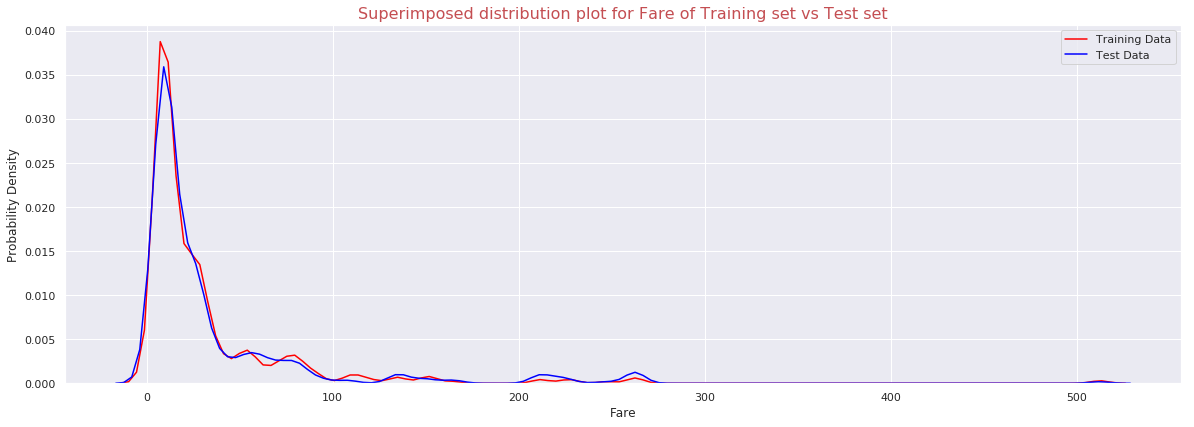

In [43]:
figure, fare = plt.subplots(figsize=(20, 6.6))
sns.distplot(train.Fare, hist=False,  color='red', label = "Training Data",ax=fare)
sns.distplot(Test.Fare, hist=False, label = "Test Data", color='blue', ax=fare)

fare.set_xlabel("Fare")
fare.set_ylabel("Probability Density")
fare.legend(["Training Data", "Test Data"], loc='upper right')
fare.set_title("Superimposed distribution plot for Fare of Training set vs Test set",
                 loc='center', fontdict={'fontsize': 16}, color='r')

### 4.1.2) Missing Values: Embarked <a id="emb"></a>

In [44]:
# Check variable Embarked for missing values:
print('Amount of missing data in Embarked for train:', train.Embarked.isnull().sum())
print('Amount of missing data in Embarked for test:', Test.Embarked.isnull().sum())

Amount of missing data in Embarked for train: 2
Amount of missing data in Embarked for test: 0


In [45]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Embarked is a category variable. It is not easy to find its correlation with other variables. So we turn our attention to the EDA we have done earlier in section 3.2.3. If you allow me to make an educated guess, I would say embarked may be most related with Pclass and Fare - the logic lies in assuming that certain cities are "richer" than other cities - and hence a reasonable assumption is that the passengers who come from the "richer" cities should also be of higher class and fare. 

We can see from our EDA that Southampton has the most Pclass 1 passengers and I would just imputate the embarked by S.

In [46]:
# pclass1_fare = train[train.Pclass == 1].sort_values(['Embarked','Fare'])
# g = sns.FacetGrid(pclass1_fare,col = "Embarked")
# g.map(sns.distplot, "Fare", kde = False)

In [47]:
train['Embarked'] = train['Embarked'].fillna('S')

### 4.1.3) Missing Values: Age <a id="age"></a>

In [48]:
# Check variable Embarked for missing values:
print('Amount of missing data in Age for train:', train.Age.isnull().sum())
print('Amount of missing data in Age for test:', Test.Age.isnull().sum())

Amount of missing data in Age for train: 177
Amount of missing data in Age for test: 86


**Fill in missing values for Age.**

**Age has quite a lot of missing values**. So when there are a lot of missing values, we should choose the imputation strategy carefully.<br>

In order to understand which missing value imputation strategy to choose, we need to need to answer some questions about variable Age:

<br>

1. Are values in variabe Age missing at random? - if not, it is useful to have feature to capture information in which rows Age is missing.

<br>

2. We will choose 2 different strategies to capture missing values and compare model performance for them: mean/median imputation and build models to impute missing values. This 2 strategies are very different from each other:
    - Mean/median imputation is easy and works well, however it distorts original variance of variable and covarience of variable with other features
    - Building a model to predict values is normally a very good estimate of missing values, however, it tends to give too perfect values for real situation. It results in unrealistic prediction due to standard error is deflation.
    
    
<br>

Also I will create copy versions of train data set because I want to compare and contrast the different methods using median imputation in the second part. 

Some of the below age imputation Code was taken and modified from https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic. Please check his kernel out, a concise one with neat lines of codes! Impressive.
    

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for age of Survived and Not Survived')

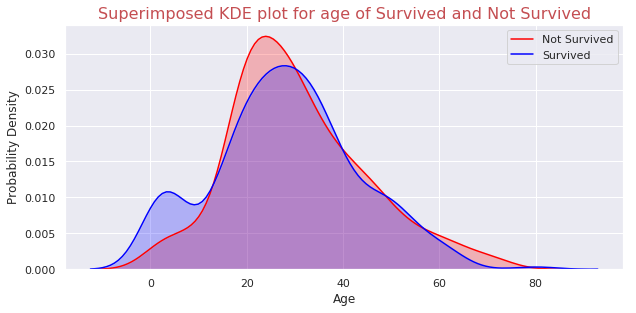

In [49]:
# Explore Age distibution
figure, myaxis = plt.subplots(figsize=(10, 4.5))

preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Red", shade=True, legend=True)


# a faster code using loc function is sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')

preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 1) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)

myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["Not Survived", "Survived"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

In [50]:
copy5 = train.copy()
missing_age_rows2 = copy5.Age.isna()
missing_age_rows2
#age_by_pclass_SibSp = copy5.groupby(['Pclass', 'SibSp']).median()['Age']
#age_by_pclass_SibSp[1].index.tolist()
#age_by_pclass_SibSp[3][8] = age_by_pclass_SibSp[3][5] #since no age values for pclass 3 and sibsp 8 we fill it with
#pclass 3 and sibsp5

#for pclass in range(1, 4):
    #for siblings in age_by_pclass_SibSp[pclass].index.tolist():
        #print('Median age of Pclass {} with {} siblings: {}'.format(pclass, siblings, age_by_pclass_SibSp[pclass][siblings]))
#print('Median age of all passengers: {}'.format(copy5['Age'].median()))

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [51]:
age_by_pclass_SibSp = copy5.groupby(['Pclass', 'SibSp']).median()['Age']
age_by_pclass_SibSp

Pclass  SibSp
1       0        37.0
        1        38.0
        2        44.0
        3        23.0
2       0        30.0
        1        29.0
        2        23.5
        3        30.0
3       0        26.0
        1        25.0
        2        19.5
        3         6.0
        4         6.5
        5        11.0
        8         NaN
Name: Age, dtype: float64

The idea is to fill the missing values of Age by the median of the Pclass and Sibsp. For example, if Mr John's age is missing the training data set, and he belongs to Pclass 1 and and has 3 siblings (SibSp 3), then we shall fill in the missing age with 23. This may seem better than just filling in Mr John's age by the median of the whole population of the passengers in Titanic. We will use the same idea for the test dataset as well. (Always bear in mind that overfitting may occur, but to prevent overfitting is another lesson for another day!)

However, there is a problem, **all** passengers of Pclass 3 and SibSp 8 have missing values, so we cannot find any median value for that category. So for simplicity sake, we fill in manually the missing ages of those who belong to Pclass 3 & SibSP 8 to be the median age of passengers belonging to Pclass 3 & SibSP 5 value, which is 11.

In [52]:
age_by_pclass_SibSp[1].index.tolist()
age_by_pclass_SibSp[3][8] = age_by_pclass_SibSp[3][5] #since no age values for pclass 3 and sibsp 8 we fill it with
#pclass 3 and sibsp5
age_by_pclass_SibSp

[0, 1, 2, 3]

Pclass  SibSp
1       0        37.0
        1        38.0
        2        44.0
        3        23.0
2       0        30.0
        1        29.0
        2        23.5
        3        30.0
3       0        26.0
        1        25.0
        2        19.5
        3         6.0
        4         6.5
        5        11.0
        8        11.0
Name: Age, dtype: float64

To give a neat representation of what we have done, the below code gives the median age of the passengers with pclass i with j number of siblings.

In [53]:
for pclass in range(1, 4):
    for siblings in age_by_pclass_SibSp[pclass].index.tolist():
        print('Median age of Pclass {} with {} siblings: {}'.format(pclass, siblings, age_by_pclass_SibSp[pclass][siblings]))
print('Median age of all passengers: {}'.format(copy5['Age'].median()))


Median age of Pclass 1 with 0 siblings: 37.0
Median age of Pclass 1 with 1 siblings: 38.0
Median age of Pclass 1 with 2 siblings: 44.0
Median age of Pclass 1 with 3 siblings: 23.0
Median age of Pclass 2 with 0 siblings: 30.0
Median age of Pclass 2 with 1 siblings: 29.0
Median age of Pclass 2 with 2 siblings: 23.5
Median age of Pclass 2 with 3 siblings: 30.0
Median age of Pclass 3 with 0 siblings: 26.0
Median age of Pclass 3 with 1 siblings: 25.0
Median age of Pclass 3 with 2 siblings: 19.5
Median age of Pclass 3 with 3 siblings: 6.0
Median age of Pclass 3 with 4 siblings: 6.5
Median age of Pclass 3 with 5 siblings: 11.0
Median age of Pclass 3 with 8 siblings: 11.0
Median age of all passengers: 28.0


In [54]:
copy5['Age'] = copy5.groupby(['Pclass', 'SibSp'])[
    'Age'].apply(lambda x: x.fillna(x.median()))
# this line is the single code that we need to fill up all the 
#missing values: powerful one liner from 
#https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic.

#however do not forget that the above line of code does not take care of the 7 missing NaN values from passengers
#from Pclass 3 & SibSp 8. So we fill in the remaining 7 missing values to be age 11.

copy5['Age'] = copy5.Age.fillna(11) #think this step cause no values for NA value.
copy5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### **Comparing the distribution of age before imputation and after imputation**

In this small subsection I attempt to compare the distribution of age vs survival before imputation and after imputation but failed to find an elegant way to write it out, so bear with the messy codes - I will edit the codes once I can find a short way to plot them. 


1. Comparing the KDE plot for the age of those who perished before imputation against the KDE plot for the age of those who perished after imputation.

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for age of not survived: pre-imputation vs after-imputation')

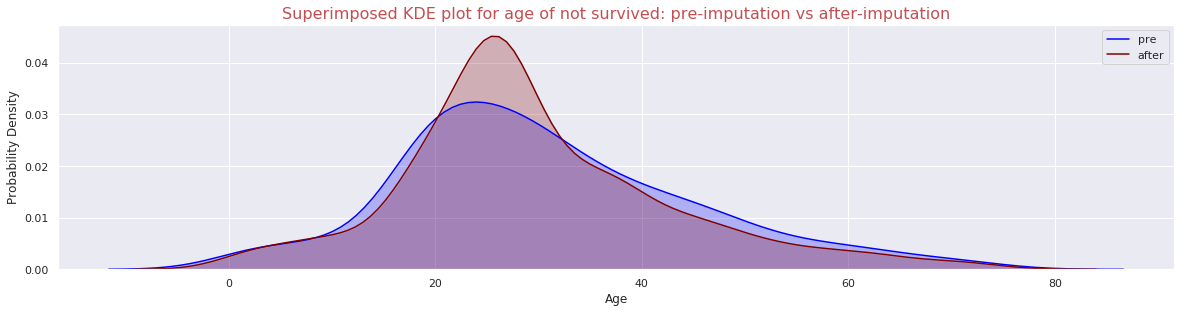

In [55]:
# Explore Age distibution
figure, myaxis = plt.subplots(figsize=(20, 4.5))

preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)


# a faster code using loc function is sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')


afterimputation=sns.kdeplot(data=copy5["Age"][(copy5["Survived"] == 0) & (
    copy5["Age"].notnull())], kernel='gau', ax=myaxis, color="maroon", shade=True, legend=True)


# a faster code using loc function is sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')


myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["pre", "after"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of not survived: pre-imputation vs after-imputation",
                 loc='center', fontdict={'fontsize': 16}, color='r')

2. Comparing the KDE plot for the age of those who survived before imputation against the KDE plot for the age of those who survived after imputation.

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for age of survived: pre-imputation vs after-imputation')

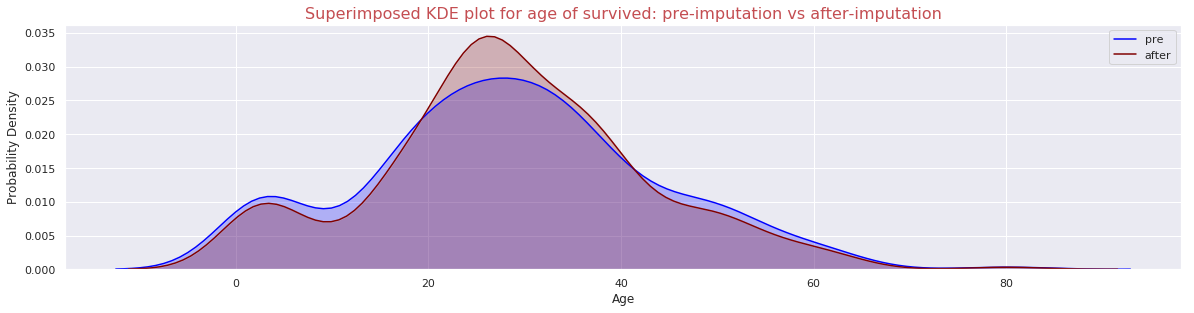

In [56]:
# Explore Age distibution
figure, myaxis = plt.subplots(figsize=(20, 4.5))

preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 1) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)


# a faster code using loc function is sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')

afterimputation=sns.kdeplot(data=copy5["Age"][(copy5["Survived"] == 1) & (
    copy5["Age"].notnull())], kernel='gau', ax=myaxis, color="maroon", shade=True, legend=True)

myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["pre", "after"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of survived: pre-imputation vs after-imputation",
                 loc='center', fontdict={'fontsize': 16}, color='r')


#### **Contrasting the first imputation method with the imputation by median method**

Here I show why using median imputation may lead to more turbulent distributions. But to be honest, I have no mathematical backup on if having a vastly different distribution between the two plots is a good or bad thing.

In [57]:
copy2 = train.copy() #wanna work with copy here so dont mess up the original data values.
copy2['Age'].fillna(copy2['Age'].median(),inplace = True)

Median imputation: Comparing the KDE plot for the age of those who perished before imputation against the KDE plot for the age of those who perished after imputation. Here we can see that the distribution between pre-imputation and after-imputation using this method is quite large - much more difference than our first method.

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for age of not survived: pre-imputation vs after-imputation')

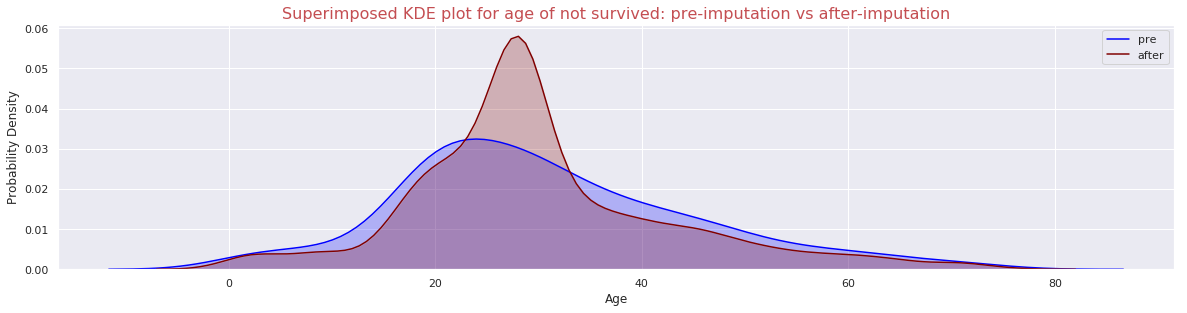

In [58]:
# Explore Age distibution
figure, myaxis = plt.subplots(figsize=(20, 4.5))

preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)


median1=sns.kdeplot(data=copy2["Age"][(copy2["Survived"] == 0) & (
    copy2["Age"].notnull())], kernel='gau', ax=myaxis, color="maroon", shade=True, legend=True)



myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["pre", "after"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of not survived: pre-imputation vs after-imputation",
                 loc='center', fontdict={'fontsize': 16}, color='r')

Median imputation: Comparing the KDE plot for the age of those who survived before imputation against the KDE plot for the age of those who perished after imputation. 

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Probability Density')

Text(0.5, 1.0, 'Superimposed KDE plot for age of survived: pre-imputation vs after-imputation')

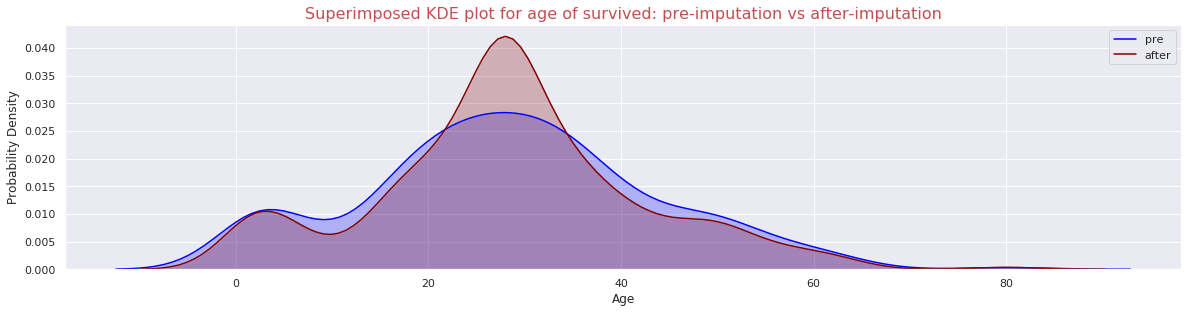

In [59]:
# Explore Age distibution
figure, myaxis = plt.subplots(figsize=(20, 4.5))




preimputation=sns.kdeplot(data=train["Age"][(train["Survived"] == 1) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)





median1=sns.kdeplot(data=copy2["Age"][(copy2["Survived"] == 1) & (
    copy2["Age"].notnull())], kernel='gau', ax=myaxis, color="maroon", shade=True, legend=True)

myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["pre", "after"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of survived: pre-imputation vs after-imputation",
                 loc='center', fontdict={'fontsize': 16}, color='r')

#### **Important final note for imputation**

One wonders what is the point of comparing distributions pre-imputation and after-imputation? Do they need to follow the same distribution? Well, to me this is not an obvious answer - but one intuitive explanation is as follows.

- We assumed that the missing age values are Missing at Random (MAR) read: https://statisticalhorizons.com/missing-at-random.

<br>

- Data on Y are said to be missing at random if the probability of missing data on Y is unrelated to the value of Y, after controlling for other variables in the analysis. To express this more formally, suppose there are only two variables X and Y, where X always is observed and Y sometimes is missing. MAR means that $$\text{Pr}(Y \text{missing}~|~Y,X) = \text{Pr}(Y \text{missing}~|~X)$$

<br>

- Since the missing values are MAR, it should be the case that the pre-imputation distribution should be similar to the after-imputation distribution. This is why many people like to do a comparison to get a feel if the distribution is similar or not.

In [60]:
#Finally do not forget to let train = copy5.

train = copy5

#### **Imputation for Test set age**

In [61]:
test_age_by_pclass_SibSp = Test.groupby(['Pclass', 'SibSp']).median()['Age']
test_age_by_pclass_SibSp
Test['Age'] = Test.groupby(['Pclass', 'SibSp'])['Age'].apply(lambda x: x.fillna(x.median()))
Test.info()

Pclass  SibSp
1       0        39.0
        1        46.0
        2        55.0
        3        28.0
2       0        27.0
        1        29.0
        2        21.0
3       0        24.0
        1        20.0
        2        19.5
        3        29.0
        4        11.5
        5        10.0
        8        14.5
Name: Age, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 4.2) Outliers <a id="out"></a>

It is important to know outliers. Outliers are very important because they affect the mean and median which in turn affects the error (absolute and mean) in any data set. When you plot the error you might get big deviations if outliers are in the data set. Also do bear in mind that we can always do outliers pre- and after missing values imputation. 

<br>

**Also, DO NOT just drop or replace the outlier with the mean/(or what not) JUST because the algorithm or the box and whisker plot says SO! Think before you act! Sometimes we have to make sense of the data - ask yourself first, are the outliers justifiable?? Why did the outliers exist? Do we need them in order to make the model more accurate?**

- If one is sure outliers are caused by incorrect entry or human errors. One can DROP the outlier.

<br>

- More commonly, the outlier affects both results and assumptions.  In this situation, it is not legitimate to simply drop the outlier.  You may run the analysis both with and without it, but you should state in at least a footnote the dropping of any such data points and how the results changed.

<br>

- If the outlier creates a significant association, you should drop the outlier and should not report any significance from your analysis.

<br>

**In general, one can always be careful and analyse the model with and without the outliers. Justify why you want to remove them, or replace them.**




Also, Please draw box and whisker plot and normal probability plots as the visuals will give you a good understanding of the outliers.

Lastly, a repeated reminder is to check outliers before data imputation.

<br>

Here we use Tukey's method for detecting outliers:

**Definition of Tukey's Fences**

If $Q_1$ and $Q_2$ are the lower and upper quartile respectively, the one could define an outlier to be any observation outside the range of $$\left[Q_1-k(Q_3-Q_1), Q_3+k(Q_3-Q_1)\right]$$

for some non-negative k, and John Tukey proposes this k should be 1.5.



In the following chunk of code, I will use a code from a very experienced fellow Kaggler: But on top of that, since I mentioned that coding is an integral part of data science, and I am not experienced with coding, I will make an attempt to break the code into easy chunks to understand - experienced coders can skip the explanation.
https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling

In [62]:
from collections import Counter

def detect_outliers(df, n, features):
    outliers_indices = [] #create a empty list to keep track of the passenger row number.
    for col in features:
        # 1st quartile (25%)
        Q1 = np.nanpercentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.nanpercentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step)
                              | (df[col] > Q3 + outlier_step)].index
        
        #print(df[(df[col] < Q1 - outlier_step)
                              #| (df[col] > Q3 + outlier_step)].index)
        print(col,Q1-outlier_step,Q3+outlier_step)
        # append the found outlier indices for col to the list of outlier indices
        outliers_indices.extend(outlier_list_col)
        
    #print(outliers_indices)
    
    # select observations containing more than 2 outliers
    outliers_indices = Counter(outliers_indices)
    multiple_outliers = list(k for k, v in outliers_indices.items() if v > n)
    #print(outliers_indices)
    
    return multiple_outliers


Outliers_to_drop = detect_outliers(train, 2, ["Age", "SibSp", "Parch", "Fare"])


Age -0.5 59.5
SibSp -1.5 2.5
Parch 0.0 0.0
Fare -26.724 65.6344


**Explanation for the code above, going line by line**

1. def detect_outliers(df, n, features) is defining a function named detect_outliers which takes in a dataset df (train), and a certain number of featured columns called features and n is the threshold. For example, if we have detect_outliers(train, 2, ["Age", "SibSp", "Parch", "Fare"]), it means that we are looking at the data set called train and the columns involved are age, sibsp, parch and fare. However, if there is this guy called John and his age is 100, he definitely will be flagged out as an outlier , but is it fair to just consider John as an outlier just because he is old? So the author of the kernel that I linked earlier defines an outlier iff the person has more than 2 outliers at any one time. For instance, we only consider John as an outlier if he has n>2 outliers on him at the same time. For we find that John has age 100 and sibsp = 30  and fare as 1000000, and we have find out that these values of John are all outliers in its own right, then John has > n =2 columns as outliers, so then only can we consider john as an outlier. 
<br>

2. outliers_indices = [] creates an empty list which we will use later.
<br>

3. for col in features: for col in features: ........(a bunch of code) means the below: let features be ['Age,'SibSp',...], for  each col, or rather for each element in features, we do the following bunch of code, starting from Age -- finish age and loop back to the start and do SibSp etc.

    For the first loop, the column we iterate through is age. In age, we find the lower quartile and upper quartile of age and the IQR, making sure we ignore NAN values by np.nanpercentile (usually people use np.percentile, take note and in that case it is troublesome because if we do not ignore nan values, the lower bound and upperbound for age will both be nan because there are too many nan values.)
    
    outlier_step = 1.5 times IQR and whenever age is less than Q1- outlierstep or more than Q3+ outlierstep. So the code outlier_list_col returns column vector of row numbers whose ages are outliers. When printed out this line, we have 
Int64Index([33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851], dtype='int64'), meaning row 33, 54, 96... are the rows of Age being an outlier.
<br>

4. Also at this step, you can print(col,Q1-outlier_step,Q3+outlier_step) and return the range of outlier for each col.
<br>

5. Now onto the next code,  outliers_indices.extend(outlier_list_col), recall the first line we have an empty list for outliers_indices =[]. Now we put each element in the column vector of row number index for age into the empty list []. So for example, row 33 and 54 are age outliers, then the outliers_indices = [33,54]; Now we have finished 1 loop, loop back again
but for the next column sibsp, rinse and repeat until the end of columns. For example, John is row 33, and he is outlier for age and sibsp and fare. so the final outliers_indices.extend will return a list like [33,.....,33,......,33.....] with 33 appearing 3 times. 
<br>

6. We have finished with the loops! Now we look at the next code. outliers_indices = Counter(outliers_indices)
Counter function gives you a dictionary, same example, Ivan is row number 7. So in the dictionary returned by counter, we will see something like {7:3,.......} where 7:3 is key value pair meaning, row 7 occured 3 times in the old list. This is important to know because we only want to have people who have >2 outliers as an OUTLIER. Another way is just to type list(enumerate(outliers_indices)).
<br>

7. multiple_outliers = list(k for k, v in outliers_indices.items() if v > n) 

    outliers_indices is a dictionary for eg {7:3, 2:1, 8:4} , 

    outliers_indices.items() is a list of key value tuples like [(7,3),(2,1),(8,4)]

    for item in outliers_indices.items() = [(7,3),(2,1),(8,4)] it will loop over each tuple, first loop item will be (7,3)
    second loop will be (2,1). 

    Now let us unpack the tuple instead of looping over the tuples because we are interested in the key value. k is first, v is second value, return a list of keys for which the corresponding value v is more than n, in which case n = 2 here.




**Attention**

We shall investigate why the upper and lower bound of parch is both 0. What that tells us is any value that is 
NOT 0 will be considered an outlier (because the range of Parch being an outlier is NOT from 0 to 0). This is unreasonable because that means Parch 1, 2, 3, 4 ,5, 6 will all be outliers. So sometimes do be careful when dealing with outliers, as I have always said, do not apply things blindly. (PS: do comment below if during the process I made the mistake I preach, would be greatly appreciated. Data science is relatively new to me and I'm learning everyday!)

In [63]:
Outliers_to_drop

train.loc[Outliers_to_drop]

[438, 587, 745, 27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.00,C23 C25 C27,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.20,B41,C
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,11.0,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,11.0,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,11.0,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,11.0,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S


The above table shows that there are 13 outliers. **However, it is far from satisfactory because as I said earlier, the outliers here may or may not be important. Furthermore, any passengers who has parch 1 and above will be considered an outlier - which does not make sense**. Take note that I included the above chunk of texts and codes just because I feel the author of the code is thoughtful and the code is neat! It may come in handy one day!

**Code for finding outliers individually**

Here, the code given below allows you find outliers individually.

In [64]:
def outlier_treatment(datacolumn):
    sorted(datacolumn) #must sort data first since we dealing with quartile ranges.
    Q1, Q3 = np.nanpercentile(datacolumn,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+ (1.5*IQR)
    return lower_range, upper_range



print('Upper and Lower bound for Age:',outlier_treatment(train.Age), sep = '\n')
print('Upper and Lower bound for Fare:',outlier_treatment(train.Fare), sep = '\n')
print('Upper and Lower bound for Parch:',outlier_treatment(train.Parch), sep = '\n')
print('Upper and Lower bound for Siblings:',outlier_treatment(train.SibSp), sep = '\n')





Upper and Lower bound for Age:
(-0.5, 59.5)
Upper and Lower bound for Fare:
(-26.724, 65.6344)
Upper and Lower bound for Parch:
(0.0, 0.0)
Upper and Lower bound for Siblings:
(-1.5, 2.5)


Here there is negative lowerbound which is ok, because we are not really interested in lowerbound outliers being 0 years old is not an outlier. This chunk of code gives you the lower bound and upper bound in which the age is considered not an outlier. One can however tweak the 1.5 accordingly if you feel your data is more/less sensitive to outliers. **Final note, in this section I did not replace or remove any supposed outliers, it is merely a tutorial and a bookkeep for me to know how to find outliers the next time I do a project!** 

### 4.3 Features to be dropped or added<a id="drop"></a>

As a beginner, it is always difficult for me to find out which features that are important in a ML algorithm. So why not we start off with what features we can remove first? Just like doing a MCQ exam, if we are not entirely sure of the correct choice, we should do some elimination first to reduce the complexity of the problem.

1. For example: Features with high collinearity can be removed.
<br>

2. Features with no significant importance to the model can be removed.
<br>

3. Features with too many categories can be removed - usually those are unique identification features - like Identity number, Name, Reference number of people. These features do not need to be included in the model. However, do note that one can harvest features from those unwanted features - Later we can see how we split features for the Name Category.
<br>

4. Refer to https://www.kaggle.com/volhaleusha/titanic-tutorial-encoding-feature-eng-81-8#Part-4:-Explore-Target-Variable for detailed information.
<br>

5. Lastly, according to point 3, we can really "Feature Engineer" new features to make our data more useful.

It is easy to spot some obvious features to drop, especially features that are uniquely and randomly assigned to each passenger. We see that PassengerId, Name and Ticket has an extremely large amount of unique values.  

In [65]:
# check how many unique values each feature has:


print('Number of Unique values for Name is', len(train.Name.unique()))
print('Number of Unique values for PassengerID is', len(train.PassengerId.unique()))
print('Number of Unique values for Fare is', len(train.Fare.unique()))
print('Number of Unique values for Survived is', len(train.Survived.unique()))
print('Number of Unique values for Pclass is', len(train.Pclass.unique()))
print('Number of Unique values for Parch is', len(train.Parch.unique()))
print('Number of Unique values for SibSp is', len(train.SibSp.unique()))
print('Number of Unique values for Embarked is', len(train.Embarked.unique()))
print('Number of Unique values for Cabin is', len(train.Cabin.unique()))
print('Number of Unique values for Sex is', len(train.Sex.unique()))
print('Number of Unique values for Ticket is', len(train.Ticket.unique()))

Number of Unique values for Name is 891
Number of Unique values for PassengerID is 891
Number of Unique values for Fare is 248
Number of Unique values for Survived is 2
Number of Unique values for Pclass is 3
Number of Unique values for Parch is 7
Number of Unique values for SibSp is 7
Number of Unique values for Embarked is 3
Number of Unique values for Cabin is 148
Number of Unique values for Sex is 2
Number of Unique values for Ticket is 681


There is no reason to believe that PassengerId and Ticket number have any valuable information that can impact the survival of the passengers. There might be some information to extract like maybe some ticket numbers have certain pattern that points to a certain class of passengers - that might be potentially related to survival rate.

### 4.3.1 Passenger ID <a id="id"></a>

Passenger ID is mostly randomized from the looks of it - and we **assume (it is an assumption because you might be wrong, for all you know, we can have a distribution that points to all the passengers who survived are the first half of the ID)** it has no significance on the prediction. Let us drop the passengerID column for both the training set and the test set.

In [66]:
train.drop(["PassengerId"],inplace=True,axis=1)
Test.drop(["PassengerId"],inplace=True,axis=1)

### 4.3.2 Ticket <a id="ticket"></a>

Ticket is slightly more interesting. We can indeed data mine out some interesting relationship from Ticket number. But I think it is best to drop it. For details refer to the link attached in 4.3. So below is an attempt to find some relationship between Pclass and Ticket number, and although one could see that there might be some relationship between them, it is not very strong and I decided to drop this variable as well.

In [67]:
groupby_pclass_ticket= train.groupby(["Pclass","Ticket"])
#for key, item in groupby_pclass_ticket:
    #groupby_pclass_ticket.get_group(key)
    
#groupby_pclass_ticket.describe(include = 'all')    

In [68]:
train.drop(["Ticket"],inplace=True,axis=1)
Test.drop(["Ticket"],inplace=True,axis=1)

### 4.3.3 Names  <a id="name"></a>

Usually, names are just names. But as a good data scientist, it is your responsibility to look further and carefully if this name has more information than usual. In this Titanic case, it has a title in front of the name, like Mr, Mrs etc. And that may give us an idea to extract out everyone's title from their names, so as to form a new feature - Title. Like we see some people are called Colonel, does that mean that they are from the Navy/(or the ship's captain) and hence they may have a higher chance of dying (by protecting the civilians/passengers first?)

<br>

Furthermore, we may also reduce the variance during our imputation of age just by knowing that certain titles correspond to a specific age group (Like Master John refers to teenagers at the age of maybe 14-16). Well to be honest, if I have not read numerous other people's kernels, I would probably straight away drop this Name feature from my analysis without thinking - because it seems absurd that name has anything to do with survival (as if your name could alter your fate). However, little did I realise that back in the early 1900s, names were appended to their title - and different titles represent different social classes in the society, therefore **possibly** impacting one's survival. So my assumption is that one's title will have an impact in one's survival rate - and we shall find out.

**Warning! Regardless whether this kernel is focusing on the Logistic Regression Model or not, we try our best to avoid high collinearity between independent variables, so while we may find very useful new features extracted from some variables, it is important to keep in mind that there may be multicollinearity - which is not desired (although there are times that some multicollinearity is fine).**

In [69]:
train.Name.head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [70]:
# Create function that take name and separates it into title, family name and deletes all puntuation from name column:
def name_sep(data):
    families=[]
    titles = []
    new_name = []
    #for each row in dataset:
    for i in range(len(data)):
        name = data.iloc[i]
        # extract name inside brakets into name_bracket:
        if '(' in name:
            name_no_bracket = name.split('(')[0] 
        else:
            name_no_bracket = name
            
        family = name_no_bracket.split(",")[0]
        title = name_no_bracket.split(",")[1].strip().split(" ")[0]
        
        #remove punctuations accept brackets:
        for c in string.punctuation:
            name = name.replace(c,"").strip()
            family = family.replace(c,"").strip()
            title = title.replace(c,"").strip()
            
        families.append(family)
        titles.append(title)
        new_name.append(name)
            
    return families, titles, new_name 

Now we have a function (thanks to volhaleusha's amazing kernels and his strong codes on this - you can always do it the hardcoding way, but sometimes I just find such elegant codes). So now we have separated the **Name feature into 3 different features - we may not use all of them!** The 3 different features are Surname, Title and Newname.

#### **Creates Title as a new feature**

In [71]:
train['Surname'], train['Title'], train['Newname']  = name_sep(train.Name)
Test['Surname'], Test['Title'], Test['Newname'] = name_sep(Test.Name)
train.head()
train.Title.value_counts()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname,Title,Newname
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Braund,Mr,Braund Mr Owen Harris
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Cumings,Mrs,Cumings Mrs John Bradley Florence Briggs Thayer
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Heikkinen,Miss,Heikkinen Miss Laina
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Futrelle,Mrs,Futrelle Mrs Jacques Heath Lily May Peel
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Allen,Mr,Allen Mr William Henry


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Mme           1
Don           1
Ms            1
Jonkheer      1
Lady          1
Capt          1
the           1
Name: Title, dtype: int64

We see that there are quite a few titles with only 1 of them in the category. I have a strong feeling that I can lump some of them into one category, as shown below, 'Dr','Rev','the','Jonkheer','Lady','Sir', 'Don' are actually titles for nobles - so I should group all these noble titles into a new title called "Nobles".

One may be confused with the title names like Mlle, Mme, Don etc:

- Dr: Doctors - Should be a Noble too .

<br>

- Rev: Reverend - Consider him a Noble.

<br>

-. Major: Military Rank 

<br>

- Col: Military Rank

<br>

- Mlle: Mlle means ‘Mademoiselle’ which is the honorific used to describe someone who would be called ‘Miss’ in France - However upon careful scrutiny, one of the Mlle is called a Mrs. But let's not be too pedantic about this. Just replace it with Miss.

<br>

- Capt: Military Rank - Also probably the Captain of the Titanic.

<br>

- Lady: Female Nobles 

<br>

- Don: Male Nobles

<br>

- Jonkheer: Male Nobles

<br>

- Ms: Is just Miss, replace it with Miss later. 

<br>

- The Countess: Female Noble

<br>

- Mme: Mme means ‘Madame’ which is the honorific used to describe someone who would be called ‘Mrs’ in France. Replace it with Mrs.

<br>

- Sir: Male Nobles


<br>

So we shall add 2 more new titles: Noble, Navy and replace Ms and Mlle with Miss, replace Mme with Mrs.

In [72]:
train['Title'] = train['Title'].replace(['Ms', 'Mlle'],'Miss')
train['Title'] = train['Title'].replace(['Mme'],'Mrs')
train['Title'] = train['Title'].replace(['Dr','Rev','the','Jonkheer','Lady','Sir', 'Don'],'Nobles')
train['Title'] = train['Title'].replace(['Major','Col', 'Capt'],'Navy')
train.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Nobles     18
Navy        5
Name: Title, dtype: int64

We do a simple bar plot to check title vs survival rate. But notice that Nobles somehow have a low survival rate - which is against my intuition. So I proceeded to hypothesize that probably there are a lot of males in Nobles and hence the low survival rate. 

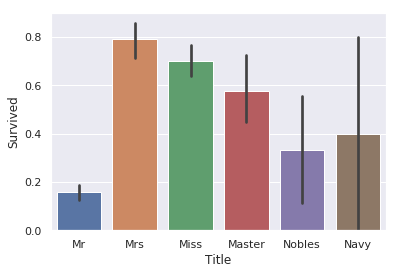

In [73]:
sns.barplot(x = 'Title', y = 'Survived', data = train)

In [74]:
nobles_survival = train[train.Title == "Nobles"].groupby(['Sex']).Survived.value_counts()
nobles_survival

Sex     Survived
female  1            3
male    0           12
        1            3
Name: Survived, dtype: int64

Indeed, there are only 3 females out of the 18 nobles and all of them survived! But that means there are 15 males and unfortunately, 12 of them died, which explains why our Nobles have so many deaths! Seems like even as a noble male, you do not get the priority pass to surviving on titanic.

#### **Do the same for test data**

In [75]:
Test.Title.value_counts()

Test['Title'] = Test['Title'].replace(['Ms','Dona'],'Miss')
Test['Title'] = Test['Title'].replace(['Dr','Rev'],'Nobles')
Test['Title'] = Test['Title'].replace(['Col'],'Navy')
Test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

Mr        240
Miss       80
Mrs        72
Master     21
Nobles      3
Navy        2
Name: Title, dtype: int64

### 4.3.4) Cabin <a id="cab"></a>



In [76]:
print('Missing values in Train set:', train.Cabin.isnull().sum())
print('Missing values in Test set:', Test.Cabin.isnull().sum())

Missing values in Train set: 687
Missing values in Test set: 327


Cabin has way too many missing values, it is not an easy task to imputate them.

In [77]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
D              3
              ..
E63            1
C128           1
C62 C64        1
C103           1
A7             1
Name: Cabin, Length: 147, dtype: int64

In [78]:
def cabin_sep(data_cabin):
    cabin_type = []

    for i in range(len(data_cabin)):

            if data_cabin.isnull()[i] == True: 
                cabin_type.append('M') #missing cabin = M 
            else:    
                cabin = data_cabin[i]
                cabin_type.append(cabin[:1]) 
            
    return cabin_type

# apply cabin sep on test and train set:
#train['cabin_type'] = cabin_sep(train.Cabin)
#Test['cabin_type'] = cabin_sep(Test.Cabin)


#train.head()

In [79]:
train['Cabin'] = train['Cabin'].fillna('M').astype(str).apply(lambda cabin: cabin[0])

There is one person on the boat deck in the T cabin and he is a 1st class passenger. T cabin passenger has the closest resemblance to A deck passengers, so he is grouped in A deck.

In [80]:
idx = train[train['Cabin'] == 'T'].index
train.loc[idx, 'Cabin'] = 'A'
train.Cabin.value_counts()
Test['Cabin'] = Test['Cabin'].fillna('M').astype(str).apply(lambda cabin: cabin[0])
Test.Cabin.value_counts()

M    687
C     59
B     47
D     33
E     32
A     16
F     13
G      4
Name: Cabin, dtype: int64

M    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

### 4.4) Binning? <a id="bin"></a>

Refer to this: 

https://stats.stackexchange.com/questions/68834/what-is-the-benefit-of-breaking-up-a-continuous-predictor-variable

http://biostat.mc.vanderbilt.edu/wiki/Main/CatContinuous

**For now I will not use Binning since I am not sure whether binning is good since binning can lose quite a lot of information and introduce unnecessary arbitrariness into the model.**

### 4.5) Encoding <a id="enc"></a>

We will convert categorical data to dummy variables for mathematical analysis. There are multiple ways to encode categorical variables; we will use the sklearn and pandas functions. In this step, we will also define our x (independent/features/explanatory/predictor/etc.) and y (dependent/target/outcome/response/etc.) variables for data modeling.

Encoding should be done after data cleaning, after all, it makes sense to fill in missing values first before encoding.

<br>

Here is a good link: [Here](https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic/notebook) is a good kernel that I follow: But since he binned age and fare, he needs to encode them because age and fare became categorical. In my kernel, I did not use Binning and hence age and fare are still numerical.

Here is a brief overview of what encoding does, and the intuition behind it. It is a very basic idea and there is no hard and fast rule which encoding method to use for every question. But in general, that is a rules of thumb to follow: But always bear in mind not to employ any method blindly.

<br>

1. Always remember, you have to decide what encoding method to use before you run the model. For example, before you use random forest algorithm, you have to process the data into something the computer can understand. Here we introduce 2 ways of encoding.
<br>

2. **Label Encoding:** For example, in our model, there is this feature called Embarked, represented by "S", "C", "Q". Now the computer only likes to work with numbers, and as a result we need to convert S, C, Q into numbers. Like labelling S = 0, C = 1, Q = 2. However, Label Encoding has a big caveat, whenever you use this encoding method, the Embarked category now has a inherent ordered relationship; Signifying that C = 1 has more weight than S = 0, and Q = 2 has more weight than C = 1 and S = 0. 

   The problem with this is when an algorithm (for eg, a logistic classification model makes USE OF THE WEIGHT in their calculation, and this is disastrous). 

   The algorithm learns: Prediction_of_survival_rate = weight_of_city * city + weight_of_gender * gender + ...... + bias.
   Now if you want to predict person A's survival rate based on the label encoding of city, you will have a problem. 
   If person A comes from Southampton, and person B comes from Queenstown, both are the same gender and let weight of city = 10.
   Then the Prediction_of_survival_rate for person A = 10 * 0 + $\epsilon$ = $\epsilon$ and the Prediction_of_survival_rate for person B = 10 * 2 + $\epsilon$  = 20 + $\epsilon$ where $\epsilon$ is a positive number.
   So naturally, our model is gonna say that person B has a much higher survival rate than person A. I believe one can already get a feel of what is going wrong here!

   However, if our algorithm is some decision tree model, **IT MAY BE fine TO STAY PUT AS LABEL ENCODER**, however, you got to be very sure your algorithm DO not use any formulas like the above to calculate output.

<br>

Acceptable example:

if City == 0 (aka = S) then
  do this decision
else if City == 1 (aka = C) then
  do that decision
else if City == 2(aka = Q) then
  do last decision
  
  <br>
  
In the above example, we see that it does not matter what the city is encoded as, as it does not affect the end result.
<br>

3. **One Hot Encoding**

![encoder](https://raw.githubusercontent.com/ghnreigns/imagesss/master/123.jpg)

Here I took the image from https://medium.com/@michaeldelsole/what-is-one-hot-encoding-and-how-to-do-it-f0ae272f1179 and idea from https://forums.fast.ai/t/to-label-encode-or-one-hot-encode/6057/4 .

Initially, apple is labeled 1, chicken labeled as 2, broccoli labeled as 3. The idea now is that under the food name column, there are 3 categories, namely, apple, chicken and broccoli. Now for each category, we create an additional binary column for each category.

<br>

So back to our Titanic example, the column name (feature) is Embarked, with 3 categories inside, S, C and Q. Now with one hot encoding, the distance for S, C and Q are equal. 

<br>

S: [1,0,0]

C: [0,1,0]

Q: [0,0,1]

So if we treat each of the above as a column vector, the distance between each pair of cities/Embarked is $\sqrt{2}$. Now a little confusing le, could we replicate the above example, also what is weight?
<br>


4. There is some caveats for one hot encoding. One is for the Sklearn package in python, Sklearn’s one hot encoder does not actually know how to convert categories to numbers, it only knows how to convert numbers to binary. We have to use the labelencoder first to convert categories to numbers.

    Also recognize that while one hot encoding reduces noise in your data that would have otherwise been cause by incorrect ordinal relationships, it also greatly increases the dimensionality of your data. High dimensionality has its own set of problems in machine learning, such as the curse of dimensionality. For example, if we were to think that ticket ID is important for our study, then there are literally 891 categories in the ticket ID feature. That would mean 891 new attributes/features after one hot encoding.
<br>

5. A general rule of thumb for Label Encoder vs One Hot encoder is as follows:

    i) If the categorical features are ordinal ones, use label encoder. For example, if I were to bin the Fare feature into category features such as: Cheap price, Normal price, Expensive price. Then it does make sense to say cheap = 0, normal = 1 and expensive = 2. However do note that LabelEncoder does not know what does 'cheap', 'normal' and 'expensive' mean. So it just assigns labels in order of appearance.

    ii) If non-ordinal relation, use one hot encoder.


In [81]:
train_categorical_features = ['Pclass', 'Sex','Title','Cabin', 'Embarked']

# No need to use sklearn's encoders
# pandas has a pandas.get_dummies() function that takes in a series
#     and returns a HOT encoded dataframe of that series
#     use the add_prefix() method of dataframe to add the feature name in front of the category name
#     then join the dataframe sideways (similar to pd.concat([train, dummies], axis=1))
for feature in train_categorical_features:
    dummies = pd.get_dummies(train[feature]).add_prefix(feature + '_')
    train = train.join(dummies)
    
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname,Title,Newname,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Navy,Title_Nobles,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,M,S,Braund,Mr,Braund Mr Owen Harris,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,Cumings,Mrs,Cumings Mrs John Bradley Florence Briggs Thayer,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,M,S,Heikkinen,Miss,Heikkinen Miss Laina,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,Futrelle,Mrs,Futrelle Mrs Jacques Heath Lily May Peel,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,M,S,Allen,Mr,Allen Mr William Henry,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,M,S,Montvila,Nobles,Montvila Rev Juozas,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B,S,Graham,Miss,Graham Miss Margaret Edith,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,23.4500,M,S,Johnston,Miss,Johnston Miss Catherine Helen Carrie,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,C,Behr,Mr,Behr Mr Karl Howell,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [82]:
test_categorical_features = ['Pclass', 'Sex','Title', 'Cabin', 'Embarked']

# No need to use sklearn's encoders
# pandas has a pandas.get_dummies() function that takes in a series
#     and returns a HOT encoded dataframe of that series
#     use the add_prefix() method of dataframe to add the feature name in front of the category name
#     then join the dataframe sideways (similar to pd.concat([train, dummies], axis=1))
for feature in test_categorical_features:
    dummies = pd.get_dummies(Test[feature]).add_prefix(feature + '_')
    Test = Test.join(dummies)
    
Test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Surname,Title,Newname,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Navy,Title_Nobles,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Embarked_C,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,M,Q,Kelly,Mr,Kelly Mr James,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,M,S,Wilkes,Mrs,Wilkes Mrs James Ellen Needs,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,M,Q,Myles,Mr,Myles Mr Thomas Francis,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,M,S,Wirz,Mr,Wirz Mr Albert,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,M,S,Hirvonen,Mrs,Hirvonen Mrs Alexander Helga E Lindqvist,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,24.0,0,0,8.0500,M,S,Spector,Mr,Spector Mr Woolf,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,C,Oliva y Ocana,Miss,Oliva y Ocana Dona Fermina,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,M,S,Saether,Mr,Saether Mr Simon Sivertsen,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
416,3,"Ware, Mr. Frederick",male,24.0,0,0,8.0500,M,S,Ware,Mr,Ware Mr Frederick,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


## 5) Machine Learning Modelling <a id="model"></a>

In [83]:
#importing from sklearn
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#import xgboost as xgb
from sklearn.metrics import roc_curve, auc
import scikitplot as skplt #conda install -c conda-forge scikit-plot
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_absolute_error, accuracy_score

### 5.0) Pre-Modeling Final Touch Up <a name="pre"></a>

### 5.0.1) Dropping Useless Features <a name="drop"></a>

Drop all the columns that is irrelevant. We already dropped ticket number and passenger ID earlier, now we proceed to drop the categorical columns that we have already converted to one hot encoder. For example, we do not wish to keep the sex column because one hot encoder has already split them into sex_female, sex_male.

In [84]:
drop_column = ['Pclass','Name','Sex','Cabin', 'Embarked','Surname','Title','Newname']
train.drop(drop_column, axis=1, inplace = True)

drop_column = ['Pclass','Name','Sex','Cabin', 'Embarked','Surname','Title','Newname']
Test.drop(drop_column, axis=1, inplace = True)

### 5.0.2) Separating dependent and independent variables <a name="sep"></a>

In [85]:
original_train_set_without_survived = train.drop("Survived", axis=1)
orginal_train_set_with_only_survived = train["Survived"]

### 5.0.3) Train Test Split or Cross Validation <a name="split"></a>

Before performing out modelling to our test data, we can split the training data in two using traintestsplit for training and validating your model. Then, when you have a good performance on the validation part of the training data and are happy with your model, you can apply the model to the test data and submit your predicted survival values for the test. For beginners who do not know what this step is, I will provide a brief yet intuitive explanation. But do try and fiddle around with the 4 new variables I created, namely, x_train, y_train, x_test, y_test.



In [86]:
#In this part, we will do the train test split.

x_train, x_test, y_train, y_test = train_test_split(
    original_train_set_without_survived, orginal_train_set_with_only_survived, train_size=0.8, test_size=0.2, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(712, 26) (712,)
(179, 26) (179,)


So the idea is we split our training data into 4 datasets, x_train means the training set without the outcome values (no survived column), x_train will serve as the training set. Now y_train set is the set of survived values corresponding to the x_train set. Similarly, we have **x_test which is also extracted from the training set (PAY SPECIAL ATTENTION THAT x_test IS NOT REFERRING TO THE TEST SET given to us)**, but serving the purpose as test set here. And y_test set is the set of survived values corresponding to the x_test set.

<br>

Now train_size = 0.8, test_size = 0.2 just means we split the data set into 80 percent of training data, and 20 percent test data.

<br>

Random_state is basically used for reproducing your problem the same every time it is run. If you do not use a randomstate in traintestsplit, every time you make the split you might get a different set of train and test data points and will not help you in debugging in case you get an issue. Note, it does not matter which integer value you use for random state, as long as you set it to one integer value and keep to it throughout.

<br>

However, there are many ways to **split** dataset, and sometimes other ways are superior. For example cross validation is a better way in general. However, in **Time Series** problems, train-test split or train-test-validation split might just prove to be superior because why would you care about errors in the past? You should care about errors you would make in the future. In that sense, you want to partition your dataset in past TS datapoints and the most current datapoints and perform MSE or Log Loss ( depending on whether this is classification or regression ) to evaluate how well your model can predict into the future.

<br>


**Cross Validation**

We talk about K-Fold Cross Validation (CV) first, note that there are many cross validation methods. But we have to start simple and talk about the easiest but also an efficient one here. K-Fold CV is literally performing train test split numerous times (or rather k times), but on different train test splits. If you have a data set of 1000, and set k = 10, then your dataset will be divided into 10 folds of dataset, with dataset 1 to dataset 10 each having 100 data inside. We will take dataset 1 to 9 as the "training set" and dataset 10 as the "test set" and perform the model on it, then we take dataset 1 to 8 and dataset 10 as the training set and let dataset 9 be the test set and perform the model on it. We do this iteratively (?) for 10 times until each dataset has been part of the training set. We will get 10 outputs of accuracy values and we take the average of them to be the final accuracy value.

<br>

Cross-validation is usually the preferred method because it gives your model the opportunity to train on multiple train-test splits. This gives you a better indication of how well your model will perform on unseen data. 

### 5.0.4) Feature Scaling <a name="scale"></a>

A common question when I encountered is whether you should do standardization/normalization prior to train test splitting, if we want to be careful, we should always do the standard scaler after train test splitting. i.e: After you applied train test split to x_train, x_test, we should apply scaling separately to x_train, x_test instead of applying scaling to the whole data set. Refer to https://datascience.stackexchange.com/questions/38395/standardscaler-before-and-after-splitting-data .

In [87]:
# Feature Scaling
## We will be using standardscaler to transform the data.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

## transforming "train_x"
x_train = sc.fit_transform(x_train)
## transforming "test_x"
x_test = sc.transform(x_test)

## transforming "The testset"
Test = sc.transform(Test)

### 5.0.5) Using train test split with Logistic Regression <a name="logreg"></a>

As an example for finding out the accuracy of the model using train test split method with Logistic Regression. We will cover on the work flow for Logistic Regression using the train test split method.

#### **Model Accuracy Score for Logistic Regression by using Train Test Split**

In [88]:
## call on the model object
logreg = LogisticRegression()

## fit the model with "train_x" and "train_y"
logreg.fit(x_train,y_train)
#Alternatively also can use
#print ("So, Our accuracy Score is: {}".format(round(logreg.score(x_test,y_test),8)))

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "test_x" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(x_test)

## Once predicted we save that outcome in "y_pred" variable.
## Then we compare the predicted value( "y_pred") and actual value("test_y") to see how well our model is performing. 

print ("So, Our accuracy Score is: {}".format(round(accuracy_score(y_test,y_pred),8)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

So, Our accuracy Score is: 0.82681564


Import from sklearn.metrics import accuracy_score 

<br>

Also, accuracy_score merely calculates the accuracy based on the inputs y_pred and y_true.
So in this case, our prediction is called y_pred, which takes in the input x_test, and recall x_test 
refers to the partitioned x_test set taken from the training set; and recall we do know the true corresponding
output values for x_test, the output are in y_test.

<br>

Reiterating, y_pred takes in the input of x_test and runs in a model we choose, in which case
it is logistic regression: we use log reg to predict the x_test set.

<br>

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

see example of how accuracy_score works.

#### **Confusion Matrix**

Note we want to use the confusion matrix on the test set (the test set is extracted from the dataset that we have, and we act as if we do not know the outcome of the test set, and use the model to predict the outcomes, after which we compare the predicted outcomes with the true outcomes and form the confusion matrix.

In [89]:
def confusion_matrix_model(model_used):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Dead","Predicted Survived"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm



confusion_matrix_model(logreg)

,Predicted Dead,Predicted Survived
Actual Dead,0.85,0.15
Actual Survived,0.22,0.78


#### **ROC Curve**

The concept of ROC and AUC builds upon the knowledge of Confusion Matrix, Specificity and Sensitivity. Also, the example that I will use in this article is based on Logisitic Regression algorithm, however, it is important to keep in mind that the concept of ROC and AUC can apply to more than just Logistic Regression.

<br>


A ROC curve shows you performance across a range of different classification thresholds and a confusion matrix only shows you one (typically when $\text{Pr}(y>0.5)$).

<br>

A confusion matrix can be used to measure the performance of a particular classifier with a fixed threshold. Given a set of input cases, the classifier scores each one, and score above the threshold are labelled Class 1 and scores below the threshold are labelled Class 2. 

The ROC curve, on the other hand, examines the performance of a classifier *without fixing the threshold*. Given a set of input cases, the classifier scores each one. The ROC curve is then generated by testing every possible threshold and plotting each result as a point on the curve.

The ROC curve is useful when you want to test your classifier over a range of sensitivities/specificities. This may or may not be a desirable thing to do. Perhaps you want very high sensitivity and don't care much about specificity - in this case, the AUC metric will be less desirable, because it will take into account thresholds with high specificity. The confusion matrix, on the other hand, could be generated with a fixed threshold known to yield high sensitivity, and would only be evaluated for that particular threshold.

A confusion matrix evaluates one particular classifier with a fixed threshold, while the AUC evaluates that classifier over all possible thresholds.

LogisticRegression auc is 0.87404480


<Figure size 720x648 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC for Logistic Regression (Titanic)')

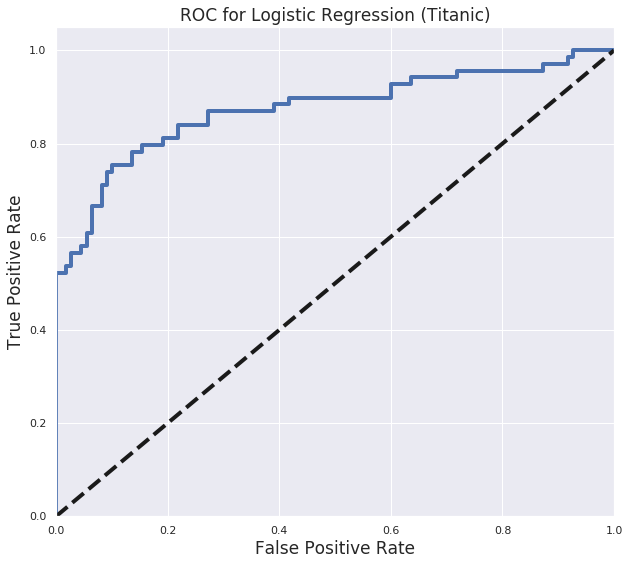

In [90]:
from sklearn.metrics import roc_curve, auc
#plt.style.use('seaborn-pastel')
y_score = logreg.decision_function(x_test) #y_pred_proba = logreg.predict_proba(X_test)[:, 1] same as this?

FPR, TPR, THR = roc_curve(y_test, y_score) #[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba) same as this
ROC_AUC = auc(FPR, TPR)
print (logreg.__class__.__name__+" auc is %2.8f" % ROC_AUC) #Gives AUC score.


#Next is draw roc graph.
plt.figure(figsize =[10,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 17)
plt.ylabel('True Positive Rate', fontsize = 17)
plt.title('ROC for Logistic Regression (Titanic)', fontsize= 17)
plt.show()

<Figure size 792x648 with 0 Axes>

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision Recall Curve for Titanic survivors')

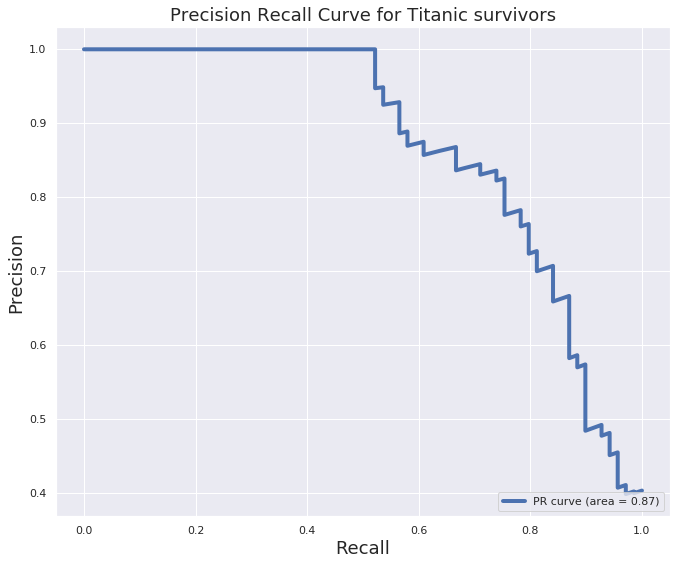

In [91]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(x_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

However, we wish to use Cross Validation to find out the accuracy scores, as demonstrated in the next section.

### 5.1) Logistic Regression by Cross Validation and Full Workflow  <a name="log"></a>

In this Section and Subsections, we will focus mainly on the work flow for the Logistic Regression Model by using cross validation method.

### 5.1.1) Step 1: Choosing Cross Validation Method  <a name="cv"></a>

As mentioned earlier, it is necessary to me that cross validation is a better method than merely splitting a data set once into train/test set. There are however a few cross validation methods and we will choose K-Fold method. 

<br>


Here we choose the K-Fold method and let k = 10 and as usual, the data will be split into 10 folds and tested upon iteratively. However, for each fold, from fold 1 to fold 10, the variance of the accuracy may be big or small, depending on how stable our dataset. Now stable is a very vague word here, so I should give an example. For example, if our accuracy for each of the folds is as follows: [0.9, 0.88, 0.9, 0.92, 0.3, 0.6, 0.9, 0.91, 0.9, 0.88], then this is a bit weird because there are 2 folds in which our accuracy is significantly lower, this should raise an alarm and one should try to find out the reason why or even have to give up such algorithms with such high variances in between accuracies.

In [92]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [93]:
x = original_train_set_without_survived
y = orginal_train_set_with_only_survived

**Now remember our feature scaling earlier on train test split?**

However, be very careful that in K-Fold Cross Validation, we do not feature scale separately, this is because as explained earlier, in K-Fold we want to plug in the entire training set. So we shall perform the scaling on the set : **original_train_set_without_survived**

In [94]:
#normalize it by using our sc previously defined - where sc = StandardScaler()
x = sc.fit_transform(x)

### 5.1.2) Step 2: Accuracy of the Model <a name="Accuracy"></a>

After we choose our way to train the model and get the result and outcomes, it is natural for us to consider the performances of the model! Now the very first step we want to check is the accuracy of the model! The formula for accuracy is simply given by 


$$\text{Accuracy} = \frac{\text{Number of correctly classified cases}}{\text{Number of all cases}}$$


<br>

And as seen in below, we first showed all our accuracy scores for each fold in the K-Fold CV validation, and the values are pretty close to each other with a standard deviation of 0.02733 - which in my opinion is a very acceptable range (one can further do some testing to show that the SD is justifiable low).

<br>

So our final accuracy score for Logistic Regression is 82.82 percent. But is that good enough? No. Let me give you one more problem. 

<br>

For example, in our Titanic Problem, we want to classify data into survive or dead. And to make the example simple, we have 1000 data set in which we achieved an 80% accuracy, that is we predicted 800/1000 correctly. This 80% accuracy seems reasonable, but however it can still be extremely bad if we have many False Positives or False Negatives. In our case, let's say we have exactly 500 people who died and 500 people who lived - Our algorithm predicts 500/500 correctly for those people who survived, however only 300/500 correctly for those who died. Yes, the total accuracy does add up to 80 percent and it looks good on paper, but we realised that this algorithm is extremely incapable of prediction for people who died, and that can be a big problem because in reality, we may have say, 900 people who died and 100 who survived, one can imagine how disastrous it can be if we applied the algorithm and it will give you a much lower total accuracy rate!

<br>

We shall explore some popular metrics to further ASSESS THE PERFORMANCE of the model - An extension to evaluate how accurate the model performs.


We come up with a function called Acc_score that gives the mean of all cross validated scores through the CV K-Fold.

<br>

Note that cross_val_score is a in-built function which requires you to input the model you use, the dataset to train/fit without the output variable, which is our original_train_set_without_survived = x. Also we need y, which is our orginal_train_set_with_only_survived dataset. cv refers to the cross validation method.

<br>

Also take note our function below has an np.mean() inside. This means we are taking the average of all the cross val scores. One can remove np.mean and just merely return all the cross val scores in a list.

In [95]:
def Acc_score(model):
    return np.mean(cross_val_score(model,x,y,cv=k_fold,scoring="accuracy"))

In [96]:
logreg2=LogisticRegression()

print("Accuracy Scores: " + format(cross_val_score(logreg2,x,y,cv=k_fold,scoring="accuracy")))
print(" ") #leave empty line
print("Mean Accuracy Score: " + str(Acc_score(logreg2)))
print(" ")
print("Standard Deviation:", cross_val_score(logreg2,x,y,cv=k_fold,scoring="accuracy").std())

Accuracy Scores: [0.87777778 0.80898876 0.80898876 0.82022472 0.80898876 0.80898876
 0.83146067 0.84269663 0.79775281 0.87640449]
 
Mean Accuracy Score: 0.828227215980025
 
Standard Deviation: 0.027330073305794178


### 5.1.3) Step 3: ROC and AUC <a name="roc"></a>

Below is the code for averaging out 10 fold cross validation for AUC score.

In [97]:
scores_auc = cross_val_score(logreg2, x, y, cv=k_fold, scoring='roc_auc')
#Notice scoring = roc_auc now.  https://scikit-learn.org/stable/modules/model_evaluation.html
print("AUC score for 10 fold Cross Validation:", scores_auc)
print(" ")
print("Mean AUC score for 10 fold Cross Validation:", scores_auc.mean())

AUC score for 10 fold Cross Validation: [0.9089995  0.84180791 0.83147942 0.85324948 0.89008363 0.83036707
 0.83333333 0.90378198 0.87948718 0.91388045]
 
Mean AUC score for 10 fold Cross Validation: 0.8686469949449803


In [98]:
def plt_roc_curve(name, model, cv_x_test, cv_y_test, has_proba=True):
    if has_proba:
        fpr,tpr,thr=skplt.metrics.roc_curve(cv_y_test,model.predict_proba(cv_x_test)[:,1])
    else:
        fpr,tpr,thr=skplt.metrics.roc_curve(cv_y_test,model.decision_function(cv_x_test))
    auc= skplt.metrics.auc(fpr,tpr) #x axis is fpr, y axis is tpr

    plt.plot(fpr,tpr,label='ROC curve for %s (AUC = %0.8f)' % (name, auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    #plt.show()
    return fpr, tpr, auc

In [99]:
def run_k_fold(modeller, no_of_folds):
    scores = []
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []
    plt.figure(figsize =[10,9])
    
    k_fold = KFold(n_splits=no_of_folds, shuffle=True, random_state=0)
    fold = 1
    # the below line's x, y is from outside just now.
    #k_fold.split gives you all 10 rounds in a list of tuples [round1, round2,...]
    #each round consists of the rows to be in the training set (90%) and the rows to be in 
    #the test set (10%) for that round. 
    for rounds in k_fold.split(x, y): #don't use round as it is a in built function
        train_rows = rounds[0]
        test_rows  = rounds[1]
        CV_x_train = x[train_rows]
        CV_y_train = y[train_rows]
        CV_x_test = x[test_rows]
        CV_y_test = y[test_rows]
        model = modeller()
        model.fit(CV_x_train, CV_y_train)
        scores.append(model.score(CV_x_test, CV_y_test))
        curr_fpr, curr_tpr, curr_auc = plt_roc_curve(
            'log reg fold ' + str(fold), model, CV_x_test, CV_y_test)

        tprs.append(np.interp(mean_fpr, curr_fpr, curr_tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(curr_fpr, curr_tpr)
        aucs.append(roc_auc)
        fold += 1

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)  # popn std dev?
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.8f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return np.mean(scores)

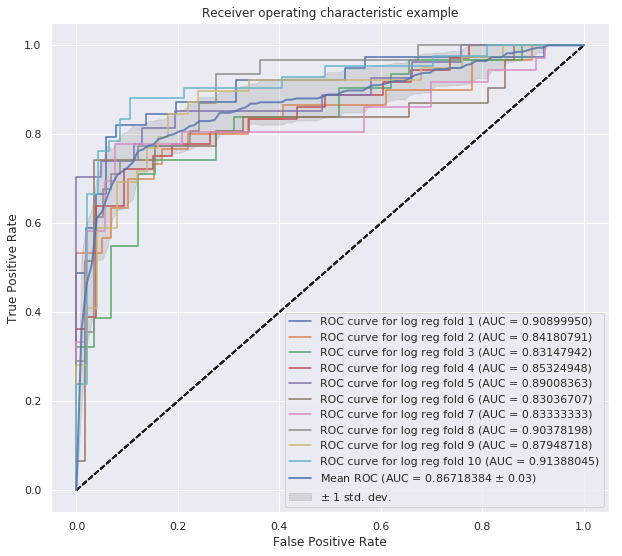

Accuracy Score: 0.828227215980025


In [100]:
accuracy_score = run_k_fold(LogisticRegression, 10)
print("Accuracy Score:", accuracy_score)
#notice that the mean roc score is different from the previous code. this is because
#we are finding the AUC of the MEAN ROC curves. In  a sense we have a 11th curve called
#the mean roc curve and we find the area under that 11th curve. While the previous code
#just mean the 10 auc of the respective rocs.

## 6) Other Machine Learning Models <a id="classifiers"></a>

### 6.1) Decision Tree<a name="rf"></a>


In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
max_depth = range(1,30)
#max_feature = list(range(1,x.shape[1]+1)) #dynamic coding
max_feature = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,'auto'] #how one knows start at 21


criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=KFold(n_splits=10, shuffle=True, random_state=42),
                                n_jobs = -1)
grid.fit(x, y) 


print( grid.best_params_)
print(" ")
print (grid.best_score_)
print(" ")
print (grid.best_estimator_)


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                    

{'criterion': 'gini', 'max_depth': 8, 'max_features': 10}
 
0.8395061728395061
 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [102]:
dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score. 
dectree_grid.score(x,y)

0.8810325476992144

### 6.2) Random Forest <a name="rf"></a>


In [103]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

rf_model.fit(x,y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

In [104]:
#print("%.3f" % rf_model.oob_score_)

In [105]:
rf_model.score(x,y)

0.8742985409652076

#### Submission for Random Forest Model

In [106]:
Test = sc.fit_transform(Test)
Test1 = pd.read_csv("../input/titanic/test.csv")

output3 = pd.DataFrame({"PassengerId": Test1.PassengerId, "Survived":rf_model.predict(Test)})
output3.PassengerId = output3.PassengerId.astype(int)
output3.Survived = output3.Survived.astype(int)

output3.to_csv("output3.csv", index=False)
print("Your submission was successfully saved!")
output3.head(10)

Your submission was successfully saved!


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


Up until now, we have went through quite a detailed process. But in the end I went through you one single model - the most simple and powerful model - Logistic Regression **Also note that even logistic regression has many more things that I have yet to explain, like ridge/lasso regression - which can prevent overfitting**. I will continue and update it to explain other models like random forest and the likes - slowly progressing more complicated models. But always remember, start simple first, do not be greedy and attempt to understand all at one go.

This kernel is still updating in progress. It will be constantly updated with good information. **If you find it resourceful, or detailed, or lacking clarity on any aspect, please comment and let me know, I just want to be improve along with the rest.**

## 7) Part 1: Intuitive explanation of Logistic Regression <a id="ls"></a>

In this wall of text below, I provide beginners who have **less** rigorous mathematical background to gain an intuition on how logistic regression works. First and foremost, in number 1 I will have an extract from the classical machine learning book "An Introduction to Statistics" on why sometimes linear regression cannot work.

1. We have stated that linear regression is not appropriate in the case of a qualitative response. Why not? Suppose that we are trying to predict the medical condition of a patient in the emergency room on the basis of her symptoms. In this simplified example, there are three possible diagnoses: stroke, drug overdose, and epileptic seizure. We could consider encoding these values as a quantitative response variable, $Y$, as follows: 

   \begin{equation}
     Y=\begin{cases}  
       1, & \text{if stroke}\\
       2, & \text{if drug overdose}\\
       3, & \text{if epileptic seizure}\\
     \end{cases}
   \end{equation}
   


   Using this coding, least squares could be used to fit a linear regression model to predict $Y$ on the basis of a set of predictors $X_{1}$, . . . , $X_{p}$. Unfortunately, this coding implies an ordering on the outcomes, putting drug overdose in between stroke and epileptic seizure, and insisting that the difference between stroke and drug overdose is the same as the difference between drug overdose and epileptic seizure. In practice there is no particular reason that this needs to be the case. For instance, one could choose an
    equally reasonable coding,

   \begin{equation}
     Y=\begin{cases}
       1, & \text{if strepileptic seizure}\\
       2, & \text{if stroke}\\
       3, & \text{if drug overdose}\\
     \end{cases}
   \end{equation}

   which would imply a totally different relationship among the three conditions. Each of these codings would produce fundamentally different linear models that would ultimately lead to different sets of predictions on test observations.

   If the response variable's values did take on a natural ordering, such as mild, moderate, and severe, and we felt the gap between mild and moderate was similar to the gap between moderate and severe, then a 1, 2, 3 coding would be reasonable. Unfortunately, in general there is no natural way to convert a qualitative response variable with more than two levels into a quantitative response that is ready for linear regression.

   For a binary (two level) qualitative response, the situation is better. For instance, perhaps there are only two possibilities for the patient's medical condition: stroke and drug overdose. We could then potentially use the dummy variable approach to code the response as follows:

    $Y= \left\{\begin{array}{l}
    0\ \mathrm{i}\mathrm{f}\ \mathrm{s}\mathrm{t}\mathrm{r}\mathrm{o}\mathrm{k}\mathrm{e};\\
    1\ \mathrm{i}\mathrm{f}\ \mathrm{d}\mathrm{r}\mathrm{u}\mathrm{g}\ \mathrm{o}\mathrm{v}\mathrm{e}\mathrm{r}\mathrm{d}\mathrm{o}\mathrm{s}\mathrm{e}.
    \end{array}\right.$

   We could then fit a linear regression to this binary response, and predict drug overdose if $\hat{Y}>0.5$ and stroke otherwise. In the binary case it is not hard to show that even if we flip the above coding, linear regression will produce the same final predictions.

   For a binary response with a 0/1 coding as above, regression by least squares does make sense; it can be shown that the $X\hat{\beta}$ obtained using linear regression is in fact an estimate of $\mathrm{P}\mathrm{r}$ (drug overdose $|X$) in this special case. However, if we use linear regression, some of our estimates might be outside the $[0$, 1$]$ interval , making them hard to interpret as probabilities!

   However, the dummy variable approach cannot be easily extended to accommodate qualitative responses with more than **two levels!!!** For these reasons, it is preferable to use a classification method that is truly suited for qualitative response values, such as the ones presented next.

2. Now we recall back in linear regression, we have independent input/variables $X$ and we seek a response/output variable $Y$. However in logistic regression, our output is in the form of a categorical variable. In our simple tutorial we will only be considering a binary output binary coded as 0 and 1. 

   As mentioned in the previous paragraph, we cannot use linear regression to predict a categorical output even if the categorical output is coded as numerical values, especially in such a classification problem with many levels in a categorical variable. As a result, we need to come up with a slightly different **hypothesis** to model our relationship for $X$ and $Y$.

   As with any modelling, there should be a "formula" between the $X$ and the $Y$. However, we have already established it is not easy to obtain an direct equation between $X$ and $Y$. Instead, in logistic regression, we are more interested in having a relation between $X$ and $P(Y = 1 ~|~ X)$. One should immediately be asking, what and why is $P(Y=1~|~X)$? Let me give you an intuition by the following example.

3. **Example**: We are trying to predict if a person has malignant tumor or not based on some inputs such as "Tumor Size" and etc. For simplicity sake, we only deal with one variable: The "Tumor Size" $X$. 

   Our output $Y$ is basically encoded as a binary class where **Yes it is Malignant Tumor** stands for 1 and **No it is not a Malignant Tumor** stands for 0. Consider the data set above, where the response "$Y$ = Malignant" falls into one of two categories, Yes (1) or No (0). As mentioned in the previous paragraph, rather than modeling this response $Y$ directly with $X$, logistic regression models the probability that $Y$ belongs to a particular category. One can see the from the below figure, the first row says that the tumour size is 1 cm and our data says that the patient's tumour is not malignant (thank god!). But as we said, we want the probability of the tumour being malignant **given** $X = 1$cm. So we write down the probability as shown below (just get this intuition first and don't wonder how are we going to find the probability first!).

    ![1](https://raw.githubusercontent.com/ghnreigns/imagesss/master/logistic-8.jpg)

   For this, in a simple (one variable only) logistic regression model, we can define our output $Y$ as a probability defined as $$P(Y=1~|~ X)$$
    
   **So to reiterate, instead of modelling our $Y$ directly with $X$, we aim to find a model that can model the probability of $Y$ given $X$.** But why? How does getting a probability help us? Although it should be obvious that $P(Y=1~|~X)$ should fall in between $0$ and $1$ since it is a probability, **but** it does not answer our question of whether you are in class 1 or 0 because ultimately, we are interested in finding out our output value which is either a 1 or a 0.

   I DO NOT CARE if you told me you found that  $P(Y=1~|~X =1.1 \text{ cm}) = 0.2349538$ which is neither 0 or 1? So this is where **classification threshold** comes in. You need to pre-define a threshold (default is usually 0.5). As a result, if we use a classification threshold of 0.5, then we will predict a $Y = \text{Yes } (1)$ for any $P(Y=1|~X) > 0.5$. To write it more compactly, we define the following indicator function. (Hello, for more experienced peeps, there is connection with AUC,ROC curves here as well!)

   \begin{equation}
     Y=\begin{cases}
       1, & \text{if $P(Y=1~|~X) \geq 0.5$} \\
       0, & \text{if $P(Y=1~|~X < 0.5$}\\
     \end{cases}
   \end{equation}

   As a result if your tumour size is 1.1 cm, then the probability of your tumour is malignant is $0.2349538$, which is less than 0.5 and we predict your as a No (not malignant). However, the threshold is there for a reason, usually, in medical and healthcare industry, we tend to be more conservative with our predictions as we have 0 tolerance for False Negatives. We rather give you a false alarm than to classify you as No Malignancy when in fact you are already at the last stage of your life. So we can tune and change our threshold to something like $P(Y=1~|~X) >0.1$ and in this case, $0.2349538$ will be in the Yes class. 

   I know we are going off the tracks, but I hope I have provided you with some intuition on how modelling the $P(Y=1~|~X)$ as a function of $X$ makes sense here.

4. **Hypothesizing and Modelling the Logistic Function:** For simplicity we call our function $P(Y=1~|~ X)$ as the function $p(X)$ and we seek to find a relationship between $p(X)$ and $X$. Although we have gone through a lot of ideas just now, it would be meaningless if we cannot find a suitable function (equation) to model $p(X)$ and $X$. 

    **Hypothesis 1: The Linear Hypothesis**

    Hmm, so we got quite some success hypothesizing linear regression models with linear functions, can we try that too on $p(X)$ and $X$? Consider that we "guess/hypothesize" that $p(X)$ have a **linear relationship** with $X$ as follows: 

    $$p(X) = \beta_0+\beta_1 X$$

    However the problem with this modelling is that for very large Tumour sizes $X$, say $X=10 \text{ cm}$, then our $p(X)$ may take values greater than $1$. And for extremely small Tumour sizes $X$, say those very small benign lumps, which may be $X=0.05 \text{ cm}$ in size, then $p(X)$ may take negative values. In any case, no matter how likely or unlikely one is to find his/her tumour to be malignant, how big or small the tumour size is, our $p(X)$ should only output values between $0$ and $1$ because $p(X)$ is a probability. Hence our linear model may be accurate to a certain extent, but not sensible.

    **Hypothesis 2**

    Instead of the linear hypothesis, we come up with another one, recall that we learnt that probability and odds have similar definition. And recall that $$\text{odds} = \dfrac{P(Y=1~|~X)}{1-P(Y=1~|~X)}$$

    So why not model the odds against $X$? If we can successfully do that, then we can easily get the probability $P(Y=1~|~X)$ since odds and probability are in a if and only if relationship. So let us try: $$\text{odds} = \dfrac{p(X)}{1-p(X)} = \beta_0 + \beta_1X$$

    But ALAS! We soon realise that the odds can only take on values from $0$ to $\infty$, but the problem still exists for the $\beta_0 + \beta_1X$ since some $X$ values can output negative values.

    But we are close, and if one has **some** mathematical backgrounds, then we know that if we take the log or ln of $\text{odds}$ then we can have the desired results.

    **Hypothesis 3: The Chosen one**

    If we finally consider the modelling of the logarithm of the odds, against the variable $X$, where we still assume a linear relationship, then we may be good to go because the logarithm of the odds gives a range of $-\infty$ to $\infty$ and matches well with $\beta_0+\beta_1X$.      

    With this we have achieved a regression model, with the output of the model being the logarithm or ln of the odds. i.e: the modelled equation is as follows:

    $$\ln\left(\dfrac{p(X)}{1-p(X)}\right) = \beta_0+\beta_1X$$

    The main reason we reach this step is because both sides of the equation can take in the same range, and thus makes more mathematical sense now. We have yet to estimate or found what the coefficients $\beta_0, \beta_1$ are. This is just a logical and sound hypothesis.

    **Recovering the Logistic Function from log odds**

    So in the previous paragraph we have settled on a hypothesis that there is a **linear relationship** between the predictor variable $X$ and the **log-odds** of the event that $Y=1$. However, do not forget what our original aim is, we modelled log odds against $X$ simply because the relationship can be mathematically justified, we ultimately want to find the probability of $Y=1$ given $X$. And that is easy, by some reverse engineering, once $\beta_0, \beta_1$ are fixed, we do some manipulation:

    \begin{equation*} 
    \begin{split}
    \ln\left(\dfrac{p(X)}{1-p(X)}\right) &= \beta_0+\beta_1X \\
    \iff  \dfrac{p(X)}{1-p(X)} &= \exp{(\beta_0+\beta_1X)}\\
    \iff p(X)  &= \dfrac{\exp{(\beta_0+\beta_1X)}}{\exp{(\beta_0+\beta_1X)}+1}\\
    \iff p(X) &= \dfrac{1}{1+\exp^{-1}{(\beta_0+\beta_1X)}}\\
    \end{split}
    \end{equation*}

    **Given the log odd mode (logit model actually), we can recover the probability of $Y=1$ given $X$ for each $X$.**


5.  **Important - The workflow process of Logistic Regression**

    - We aim to predict $Y$ given $X$ where $Y$ is encoded as $0$ and $1$.

    - It is not easy to find step 1 directly, and thus we turn out eyes to finding the probability of $Y = 1$ given $X$ instead. Imagine we are building logistic regression from scratch, and we tried to hypothesize that maybe the probability $p(X)$ can be modelled the same way as in **linear regression?** But soon realised that modelling $p(X) = \beta_0+\beta_1$ is not good since its range gives values out of $[0,1]$. In order to overcome this we can make a transformation and fit the sigmoid/logistic function which forces the output $p(X)$ to be in $[0,1]$.

        Since the transformation may not be intuitive, I have made a simple explanation above, and showed steps on how modelling $P(X)$ as a sigmoid function come back.

        Sigmoid in logistic regression:

    $$p(X) = \dfrac{1}{1+\exp^{-1}{(\beta_0+\beta_1X)}}$$

    - Finally, we have to estimate the coefficients in the $$p(X) = \dfrac{1}{1+\exp^{-1}{(\beta_0+\beta_1X)}}$$ and we use a method called **Maximum Likelihood (I will do a part 2 on this as it is also a big topic)**.

    - Once we recover the coefficients $\beta_0, \beta_1$, we can simply plug in the coefficients and the respective values of $X$ to get $p(X)$. 

    - Once we get the $p(X)$, we can define a indicator function as our classification threshold (mentioned earlier) and subsequently, get all the values of $Y$.

Stay tuned for part 2! 